In [1]:
%pylab inline

import numpy as np

import yfinance as yf
import yahoo_fin.stock_info as si
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import statistics
import pickle

import sys
sys.path.append("../")
from datetime import time
import pandas as pd

pd.set_option('display.max_rows', 240)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:

def get_ten(XLB):
    sus = yf.Ticker(XLB)
    sus = sus.history(period = "10y", interval = "1d")
    return sus['Close']

def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

In [3]:
# HIGH VOLUME AND HIGH OPEN OPTION INTEREST SECURITIES
#https://www.barchart.com/options/most-active/stocks

total = [

    'XRX', 'TAK', 'BBBY', 'VVI', 'PINS', 'CVNA', 'PTON', 'Z', 'BRCC', 'CGC', 'BIDU', # STRONG SHORT    
    'URBN', 'PENN', 'F', 'BABA', 'BEN', 'SJM', 'WU', 'COIN', 'CLX', 'GRPN', 'SFIX', 'M', #Short
    'PGR', 'HUM', 'EA', 'ES', 'CYXT', 'DASH', 'SAM', 'FCEL', 'FSLY', #Short
    'ELAN', 'HOOD', 'FOUR', 'CWH', 'UAL', 'MANU', 'NWS', 'APRN', 'YUMC', # More shorts
    'METV', 'RUN', 'FRPT', 'TDOC', 'LMND', 'FRSH', 'PPL', 'MTCH', 'SWK', # More shorts
    'WAB', 'LVS', 'W', 'ROKU', 'UPWK',# More shorts
    
    'OGN', 'OGN', 'OGN',
    'FANG', 'PPL', 'MPWR', 'WRB', #Buys
    'MA', 'MANU', 'GM', 'MRO', 'DOW', 'JNJ', 'KO', 'V', 'UNH', 'EMBC', 'OGN', #buys
    'GL', 'TAP', 'BDX', 
    'RTX', 'CLF', 'NRG', 'HST', 'ARKK', 'QLYS', 'ESTE', 'ULTA', #Buys
    'DG', 'KMB', 'GIS', 'LIN',
    'PFE', 'BJ', 'AZN', 'TMO', 'DUK', 'MDLZ', 'CB', 'ADI', #Buys
    'EOG', 'BTI', 'ADM', 'CCI', 'NOC', 'CL', 'AON', 'PXD', 'KLAC', 'AEP', 'SYY', 'AZO', #Buys
    'O', 'XEL', 'HPQ', 'PCAR', 'ES', 'MBI', 'MP', #Buys
    
    'AAL', 'AAPL', 'C',
    'ACB', 'ADBE', 'AMC', 'AMD', 'AMGN', 'AMZN',
    'ATVI', 'AXP', 'BA', 'BAC', 'BLNK', 'BYND', 'C',
    'CAT', 'CCL', 'CHWY', 'COST', 'COTY', 'CRM', 'CSCO', 'CVS',
    'CVX', 'BSX', 'CDNS', 'FCX', 
    
    'MP',
    'DAL', 'DIS', 'DKNG', 'EEM', 'FB', 'AMAT', 'ADI', 'LRCX',
    'FCEL', 'FTAI', 'GE', 'GM', 'GOLD', 'GS', 'HD',
    'HON', 'HYG', 'HYLN', 'IBM', 'INO', 'INTC', 'JD', 'JMIA',
    'JPM', 'JWN', 'KNDI', 'KSS', 'LI', 'LOW',
    'LYFT', 'M', 'MARA', 'MCD', 'MGM', 'MMM', 'MRK', 'GOOG',
    'MRNA', 'MSFT', 'MU', 'NCLH', 'NFLX', 'NKE', 'NKLA',
    'NVDA', 'OXY', 'PBR', 'PCG', 'PDD', 'PG', 'PINS',
    'PLTR', 'PLUG', 'PTON', 'QCOM', 'QQQ', 'RIDE', 'RIOT', 'RKT',
    'ROKU', 'SBUX', 'SDC', 'SLV', 'SNAP', 'SNOW', 'SOLO', 'SONO',
    'SPCE', 'SPY', 'SQ', 'T', 'TEAM', 'TGT', 'TRV', 'TSLA', 'PFE',
    'TWTR', 'UAL', 'UBER', 'UNH', 'V', 'VALE', 'VZ', 'WBA', 'ABT',
    'WFC', 'WKHS', 'WMT', 'WYNN', 'X', 'XOM', 'XPEV', 'ZM', 'ABBV',
    'LLY', 'LMT', 'INTU', 'AMT', 'MS'
]

In [4]:
longs = ['OGN',
    'FANG', 'PPL', 'MPWR', 'WRB', #Buys
    'MA', 'MANU', 'GM', 'MRO', 'DOW', 'JNJ', 'KO', 'V', 'UNH', 'EMBC', 'OGN', #buys
    'GL', 'TAP', 'BDX', 
    'RTX', 'CLF', 'NRG', 'HST', 'ARKK', 'QLYS', 'ESTE', 'ULTA', #Buys
    'DG', 'KMB', 'GIS', 'LIN',
    'PFE', 'BJ', 'AZN', 'TMO', 'DUK', 'MDLZ', 'CB', 'ADI', #Buys
    'EOG', 'BTI', 'ADM', 'CCI', 'NOC', 'CL', 'AON', 'PXD', 'KLAC', 'AEP', 'SYY', 'AZO', #Buys
    'O', 'XEL', 'HPQ', 'PCAR', 'ES', 'MBI', 'MP', #Buys
        ]

In [5]:
short = [

    'XRX', 'TAK', 'BBBY', 'VVI', 'PINS', 'CVNA', 'PTON', 'Z', 'BRCC', 'CGC', 'BIDU', # STRONG SHORT    
    'URBN', 'PENN', 'F', 'BABA', 'BEN', 'SJM', 'WU', 'COIN', 'CLX', 'GRPN', 'SFIX', 'M', #Short
    'PGR', 'HUM', 'EA', 'ES', 'CYXT', 'DASH', 'SAM', #Short
    'ELAN', 'HOOD', 'FOUR', 'CWH', 'UAL', 'MANU', 'NWS', 'APRN', 'YUMC', # More shorts
    'METV', 'RUN', 'FRPT', 'TDOC', 'LMND', 'FRSH', 'PPL', 'MTCH', 'SWK', # More shorts
    'WAB', 'LVS', 'W', 'ROKU', 'FCEL'# More shorts
]

In [6]:
volitile_losers = ['ZM', 'ROKU', 'FCEL', 'W', 'COIN', 'TDOC', 'GRPN', 'DASH', 'BYND', 'FRPT']

downward_earnings = ['XRX', 'BBBY', 'VVI', 'CVNA', 'PTON', 'BRCC', 'COIN', 'GRPN', 'SFIX', 'DASH', 'BYND',
                    'APRN', 'RUN', 'FRPT', 'TDOC', 'LMND', 'FRSH', 'W', 'LVS', 'MBI', 'ROKU', 'FCEL', 'BLNK',
                    'FSLY']

In [7]:
tk = yf.Ticker('GE')

import calendar

c = calendar.Calendar(firstweekday=calendar.SUNDAY)

year = 2021; month = 10

monthcal = c.monthdatescalendar(year,month)
third_friday = [day for week in monthcal for day in week if \
                day.weekday() == calendar.FRIDAY and \
                day.month == month][2]

In [8]:
goo = tk.option_chain('2023-01-20')[0]

za = pd.DataFrame()

n = tk.history().iloc[0]['Close']
p = ''.join(str(n).split('.')[0]+'.'+str(n).split('.')[1][:2])

za['price'] = p
za['price_'] = p
za['strike'] = goo['strike']
za['bid'] = goo['bid']
za['ask'] = goo['ask']
za['spread'] = [(goo['bid'][x] / goo['ask'][x]) for x in range(len(goo))]

In [9]:
it = []
zo = []
g = pd.DataFrame()
for x in range(len(goo)):
    so = goo['bid'][x] / goo['ask'][x]
    print(goo['strike'][x], goo['bid'][x], goo['ask'][x])
    zo.append(so)
    if so > .95:
        it.append(x)
mean(so)

2.0 9.9 11.1
3.0 8.9 10.8
4.0 8.85 10.05
5.0 7.9 8.2
7.0 6.2 6.4
10.0 3.9 4.0
12.0 2.72 2.79
15.0 1.54 1.62
17.0 1.02 1.2
20.0 0.6 0.64
25.0 0.31 0.32
27.0 0.24 0.27
35.0 33.6 34.0
40.0 29.0 29.4
45.0 24.45 24.75
50.0 20.2 20.45
55.0 16.2 16.4
60.0 12.55 12.75
65.0 9.35 9.55
70.0 6.7 6.85
75.0 4.6 4.75
80.0 3.0 3.15
85.0 1.91 2.03
90.0 1.19 1.31
95.0 0.72 0.8
100.0 0.42 0.5
105.0 0.24 0.33
110.0 0.17 0.2
115.0 0.1 0.22
120.0 0.08 0.09
125.0 0.06 0.07
130.0 0.04 0.05
135.0 0.03 0.05
140.0 0.03 0.04
145.0 0.02 0.06
150.0 0.02 0.03
155.0 0.01 0.03
160.0 0.0 0.04
165.0 0.0 0.02
170.0 0.01 0.02


0.5

In [10]:
def options_chain(symbol):

    tk = yf.Ticker(symbol)
    # Expiration dates
    exps = tk.options

    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt['expirationDate'] = e
        options = options.append(opt, ignore_index=True)

    # Bizarre error in yfinance that gives the wrong expiration date
    # Add 1 day to get the correct expiration date
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + datetime.timedelta(days = 1)
    options['dte'] = (options['expirationDate'] - datetime.datetime.today()).dt.days / 365
    
    # Boolean column if the option is a CALL
    options['CALL'] = options['contractSymbol'].str[4:].apply(
        lambda x: "C" in x)
    
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask']) / 2 # Calculate the midpoint of the bid-ask
    
    # Drop unnecessary and meaningless columns
    options = options.drop(columns = ['contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate', 'lastPrice'])

    return options

In [11]:
quote_table = si.get_quote_table("aapl", dict_result=False)


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


In [12]:
temp = si.get_stats_valuation('GE')

In [13]:
import numpy as np
from scipy.stats import norm
N = norm.cdf

def bs_call(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

def bs_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def find_vol(target_value, S, K, T, r, *args):
    MAX_ITERATIONS = 200
    PRECISION = 1.0e-5
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        price = bs_call(S, K, T, r, sigma)
        vega = bs_vega(S, K, T, r, sigma)
        diff = target_value - price  # our root
        if (abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    return sigma # value wasn't found, return best guess so far

In [14]:
p_changes = pd.DataFrame(columns=['Equity','Percent_Change', 'Mean_Change', 'Not_Absolute_Sum', 'Varience', 'Price'])


In [15]:
todays = ['QLYS', 'TAP', 'CYXT', 'PGR', 'PENN', 'LVS', 'RKT', 'UBER', 'PINS', 'DKNG']

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 54.588233902808476
XRX Precent Change:  7.3936705874687885 
 Percent_mean:  0.7143643079679989 
 Varience:  1.6256502294213995


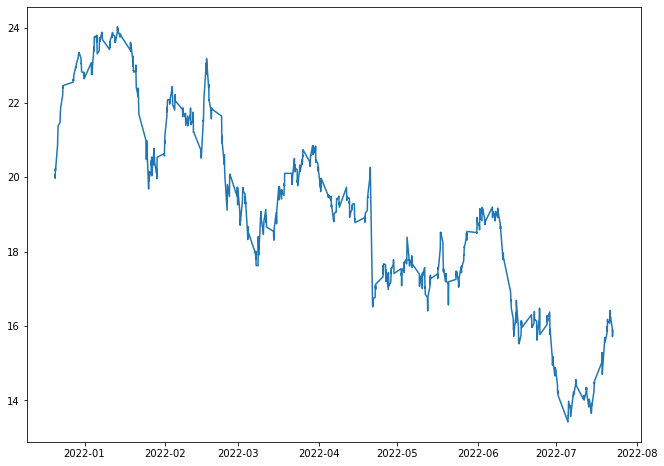

RSI 53.489874431052215
TAK Precent Change:  2.8751865207113734 
 Percent_mean:  0.27779579910254815 
 Varience:  0.7112544907092889


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

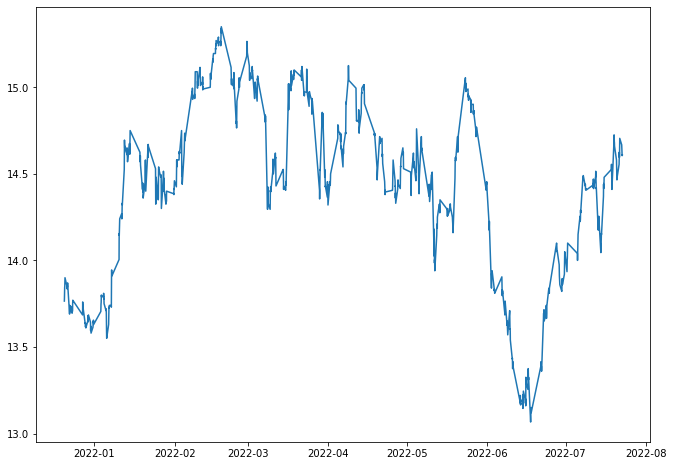

RSI 43.23799231459024
BBBY Precent Change:  16.850151860321173 
 Percent_mean:  1.6280339961662968 
 Varience:  2.358352049603932


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

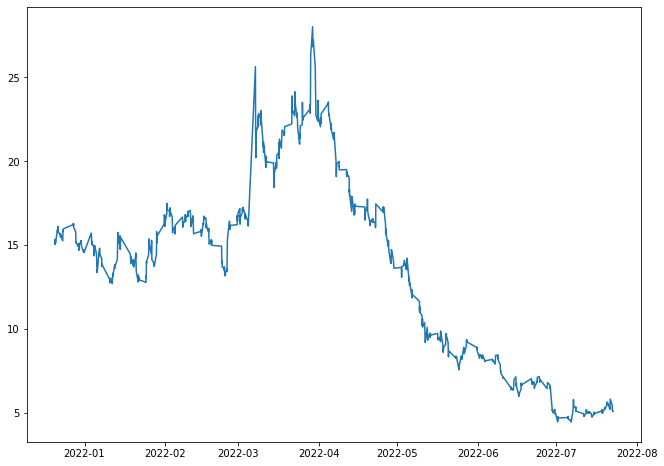

RSI 65.68356708608489
VVI Precent Change:  8.853200100614867 
 Percent_mean:  0.8553816522333205 
 Varience:  2.20507107200438


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

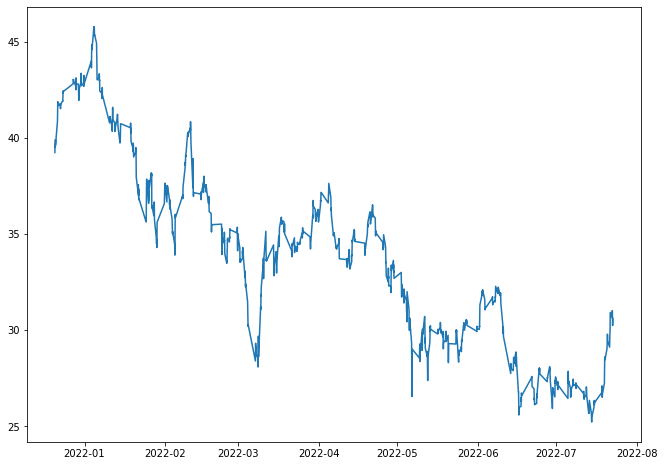

RSI 28.276988807819833
PINS Precent Change:  11.626677557544 
 Percent_mean:  1.1233504886515941 
 Varience:  2.288693760483916


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

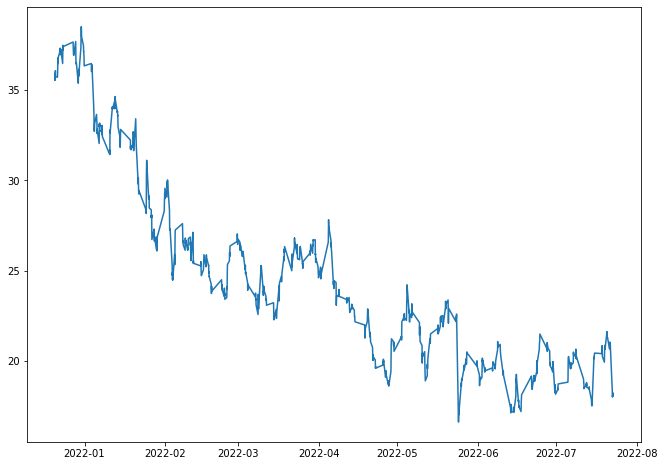

RSI 49.177790578782144
CVNA Precent Change:  20.88775044812673 
 Percent_mean:  2.018140139915626 
 Varience:  8.037488382088949


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

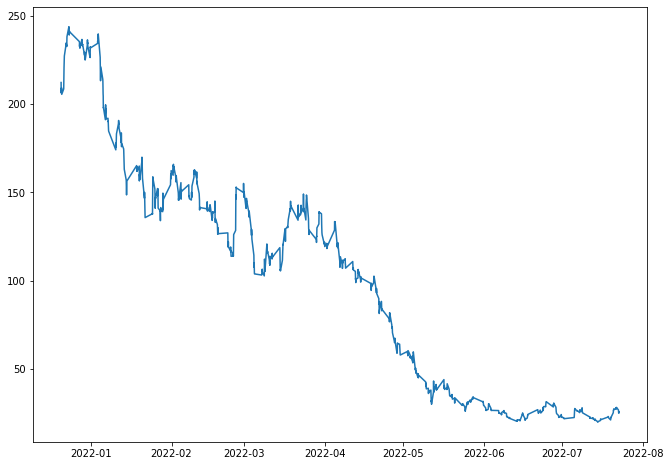

RSI 40.84936397797081
PTON Precent Change:  15.80814655737199 
 Percent_mean:  1.5273571553016416 
 Varience:  3.019700676223522


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

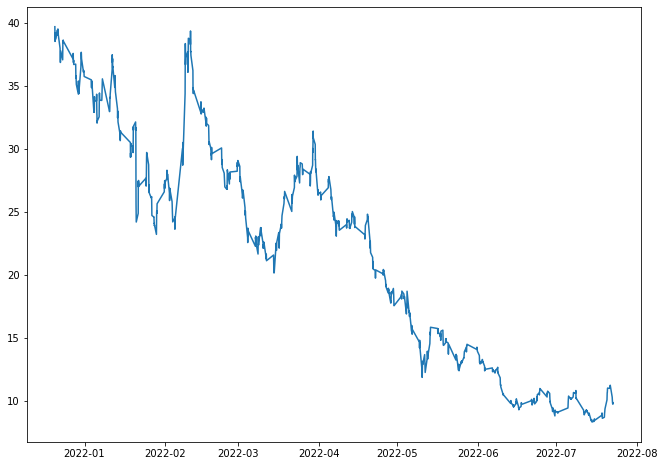

RSI 49.90896935919979
Z Precent Change:  11.367091905153037 
 Percent_mean:  1.0982697492901485 
 Varience:  3.085953794932116


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

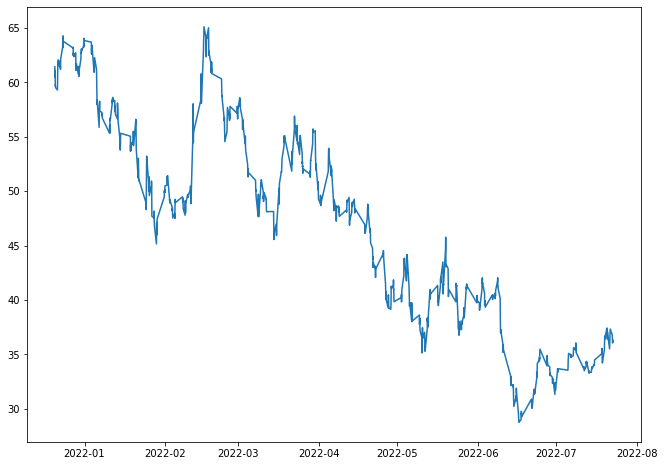

RSI 44.40438031747012
BRCC Precent Change:  13.037999310390013 
 Percent_mean:  1.665134011544063 
 Varience:  2.3947498047820237


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

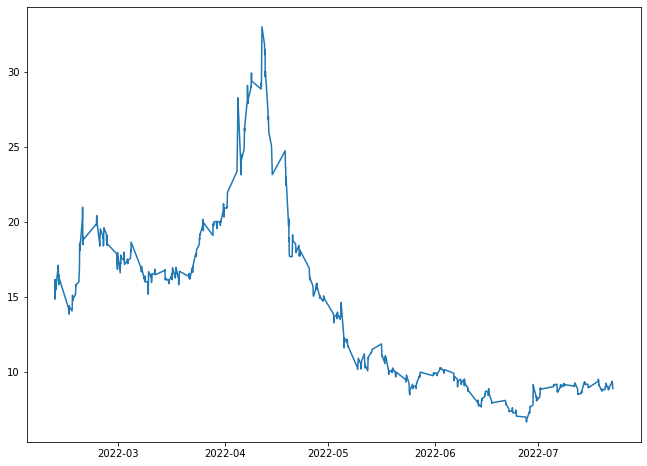

RSI 41.102050887082676
CGC Precent Change:  14.44805842149928 
 Percent_mean:  1.3959476735748095 
 Varience:  1.427153447935085


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

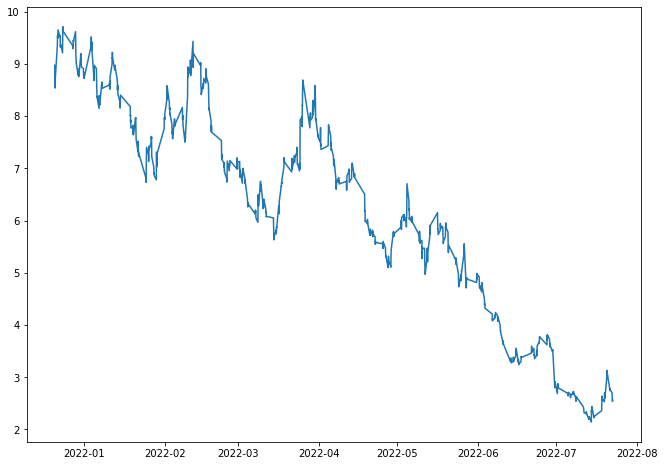

RSI 41.8302759277692
BIDU Precent Change:  9.695547268235016 
 Percent_mean:  0.9367678520033831 
 Varience:  3.8008597065275165


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

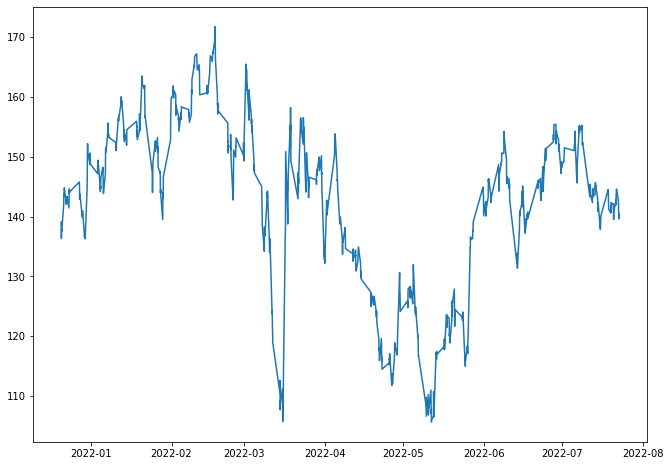

RSI 55.094694084375156
URBN Precent Change:  8.025445954265448 
 Percent_mean:  0.775405406209222 
 Varience:  1.8267375381313127


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

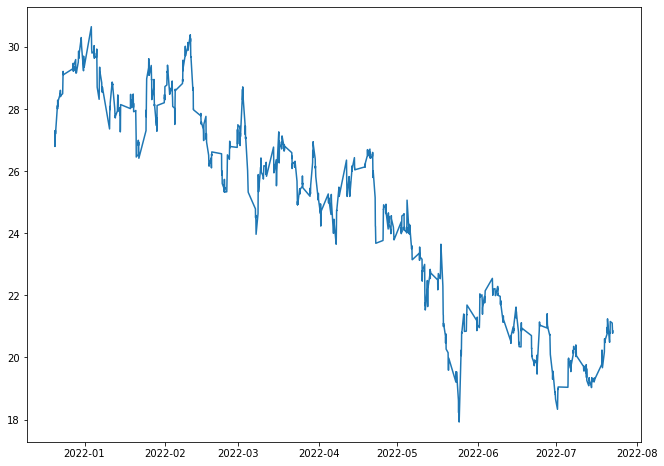

RSI 54.000615501989664
PENN Precent Change:  10.463055704010735 
 Percent_mean:  1.0109232564261579 
 Varience:  2.716947798472303


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

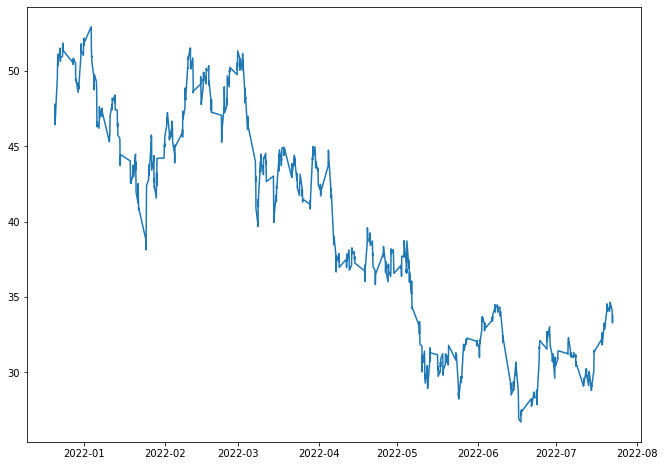

RSI 61.15384390176794
F Precent Change:  7.953303716580132 
 Percent_mean:  0.7684351416985635 
 Varience:  1.9074591563609264


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

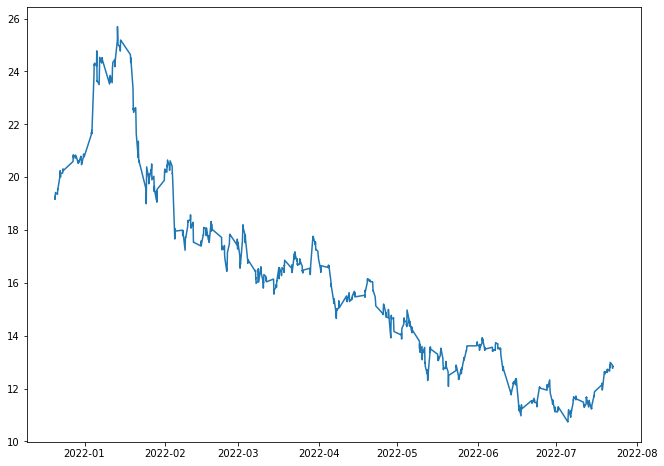

RSI 34.34211975056148
BABA Precent Change:  10.149349959980839 
 Percent_mean:  0.9806135227034626 
 Varience:  3.7221488402822587


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

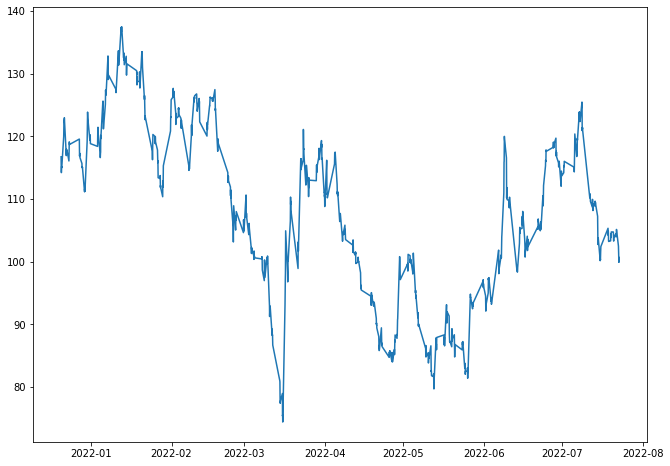

RSI 50.78466817350581
BEN Precent Change:  6.295636489100952 
 Percent_mean:  0.6082740569179663 
 Varience:  1.8534061514578348


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

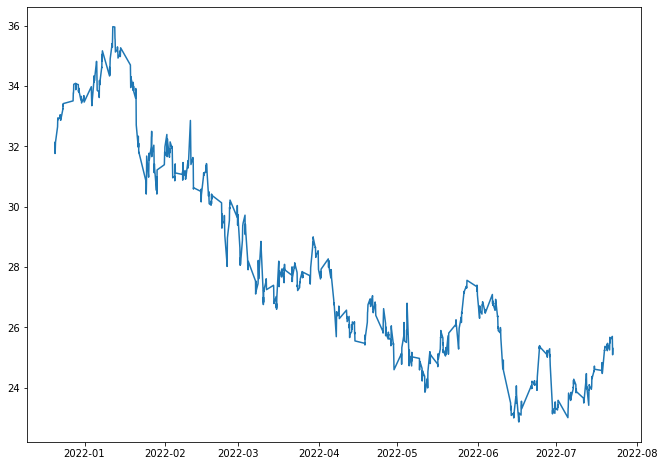

RSI 52.42024826194871
SJM Precent Change:  4.446839386322817 
 Percent_mean:  0.42964631751911275 
 Varience:  2.4763723354950007


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

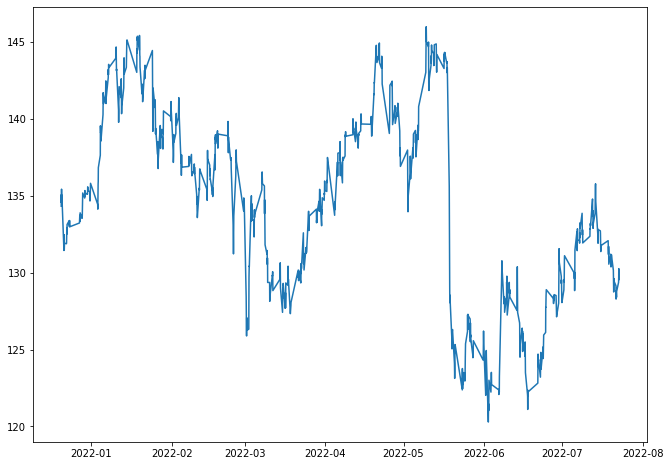

RSI 53.83874150180667
WU Precent Change:  5.374886514967427 
 Percent_mean:  0.5193127067601379 
 Varience:  1.0041426486857523


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

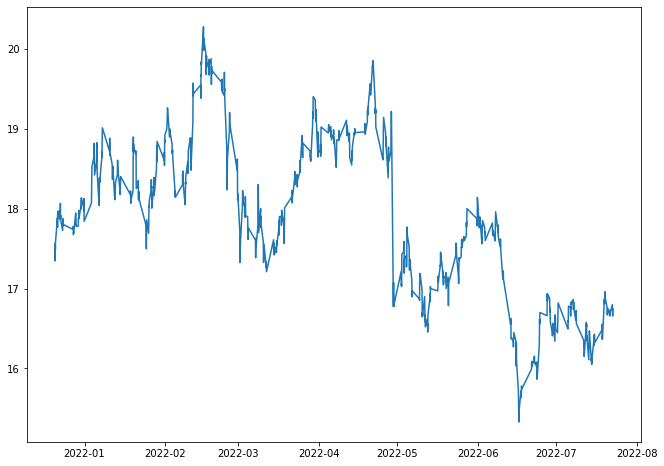

RSI 53.833329823492505
COIN Precent Change:  16.853437305460837 
 Percent_mean:  1.6283514304793079 
 Varience:  8.241737590199818


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

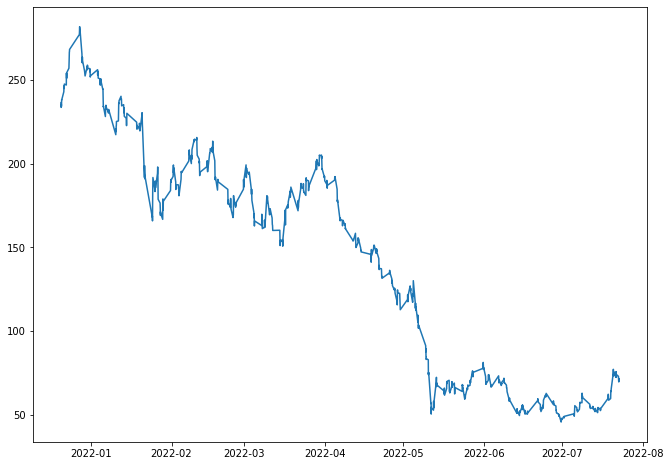

RSI 51.89039427676368
CLX Precent Change:  4.867896372510668 
 Percent_mean:  0.4703281519333979 
 Varience:  3.875997930159187


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

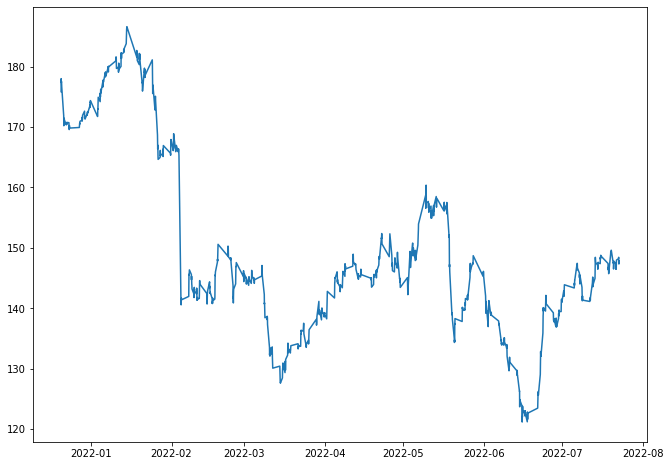

RSI 34.47856374925853
GRPN Precent Change:  13.322558750096913 
 Percent_mean:  1.2872037439707162 
 Varience:  2.2110629357037848


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

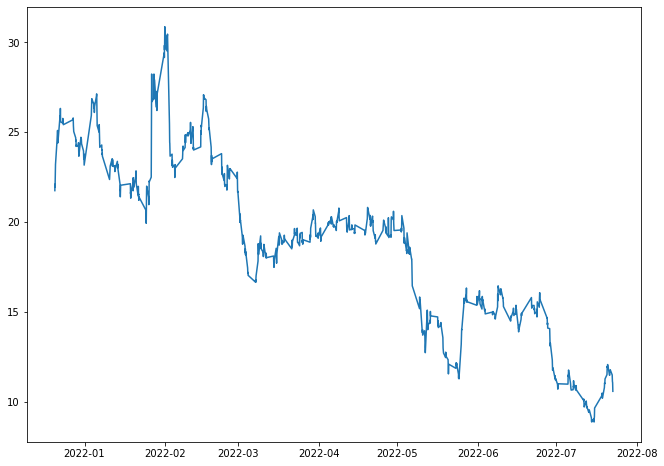

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 42.54082481985321
SFIX Precent Change:  14.907949153538695 
 Percent_mean:  1.4403815607283763 
 Varience:  2.055489440232055


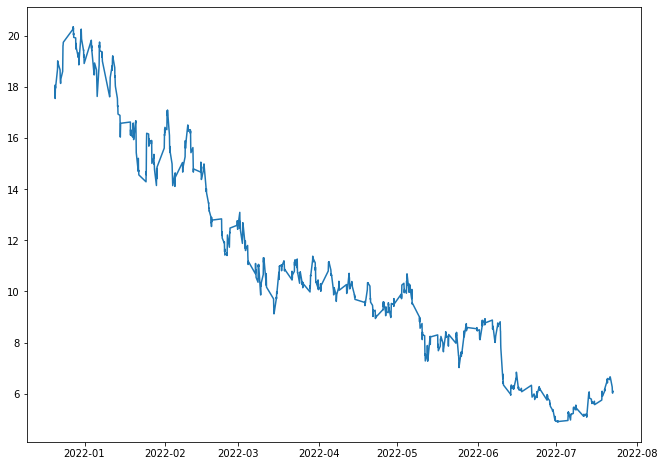

RSI 52.85193606085176
M Precent Change:  10.177371453248696 
 Percent_mean:  0.9833209133573619 
 Varience:  1.7455586617553764


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

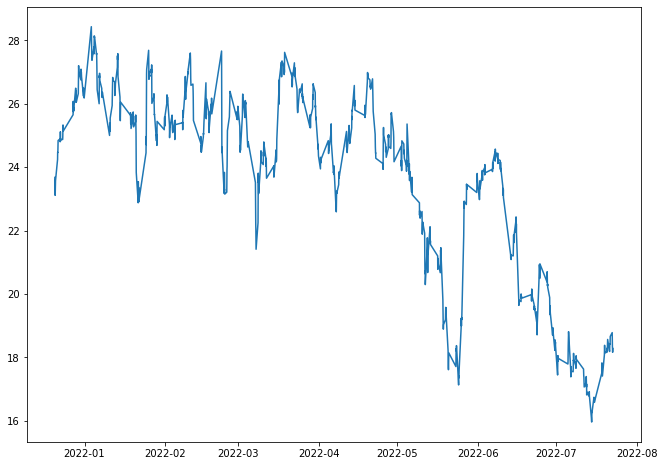

RSI 46.207760877656966
PGR Precent Change:  4.363480551644274 
 Percent_mean:  0.42159232383036466 
 Varience:  2.2359522523165


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

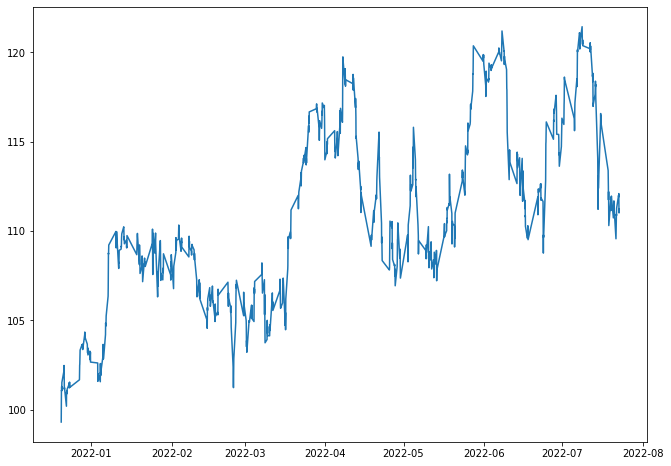

RSI 54.969513059502844
HUM Precent Change:  5.031185027751895 
 Percent_mean:  0.48610483359921686 
 Varience:  5.223103722217359


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


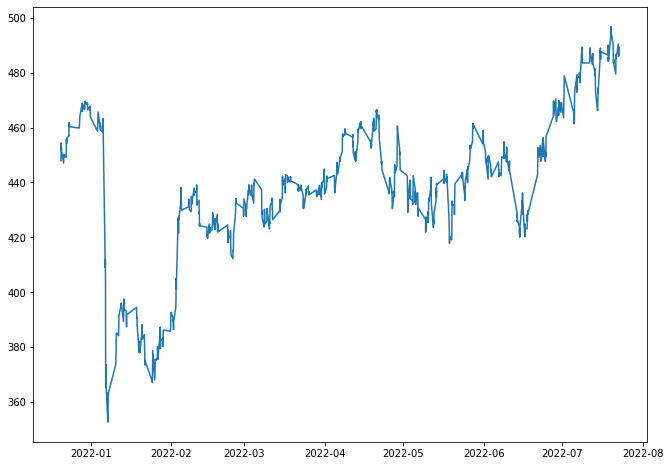

RSI 62.41473759821335
EA Precent Change:  4.7641638795432435 
 Percent_mean:  0.4603056888447578 
 Varience:  2.41258786758277


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

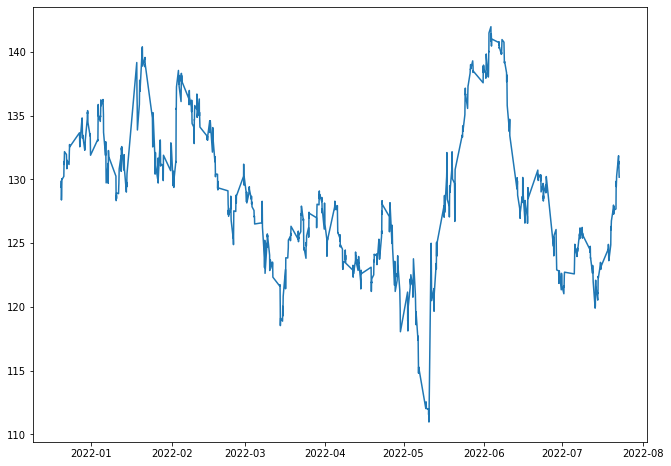

RSI 62.4738013843914
ES Precent Change:  3.8620606371944306 
 Percent_mean:  0.3731459552844861 
 Varience:  1.9384403156184005


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

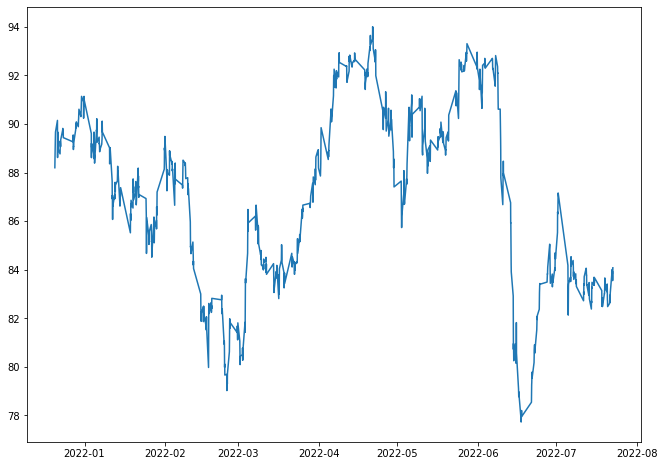

RSI 35.64825675222747
CYXT Precent Change:  9.309397203770146 
 Percent_mean:  0.8994586670309321 
 Varience:  0.9598797360792465


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

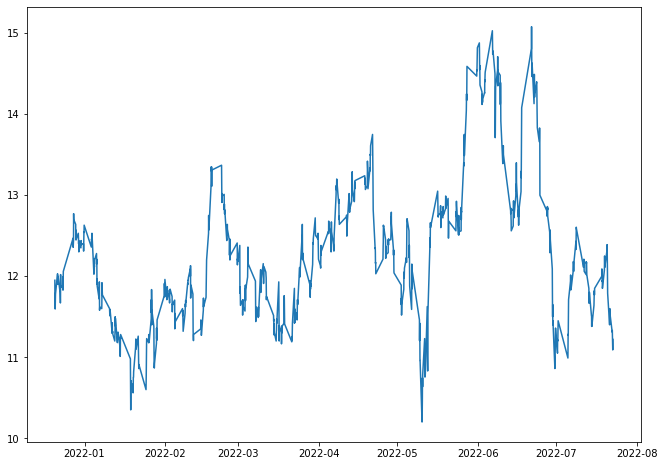

RSI 44.65439112280741
DASH Precent Change:  15.244052260098616 
 Percent_mean:  1.4728552908307841 
 Varience:  5.09431534437642


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

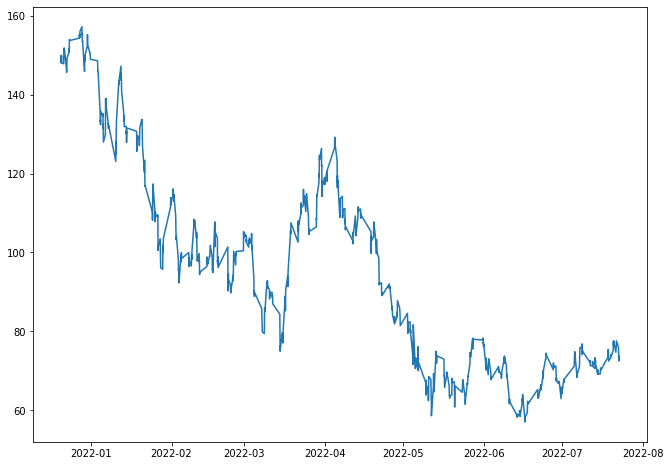

RSI 71.71143481549109
SAM Precent Change:  8.134383040100428 
 Percent_mean:  0.7859307285121186 
 Varience:  7.80170479217256


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


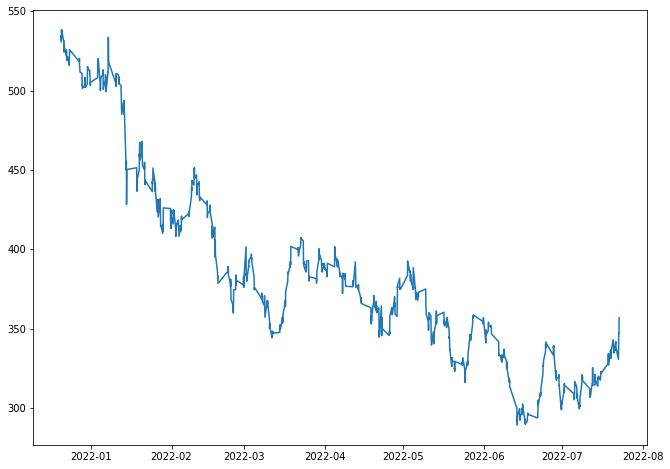

RSI 32.21894868855959
FCEL Precent Change:  14.576229118659937 
 Percent_mean:  1.4083313158125543 
 Varience:  1.0077475631709127


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

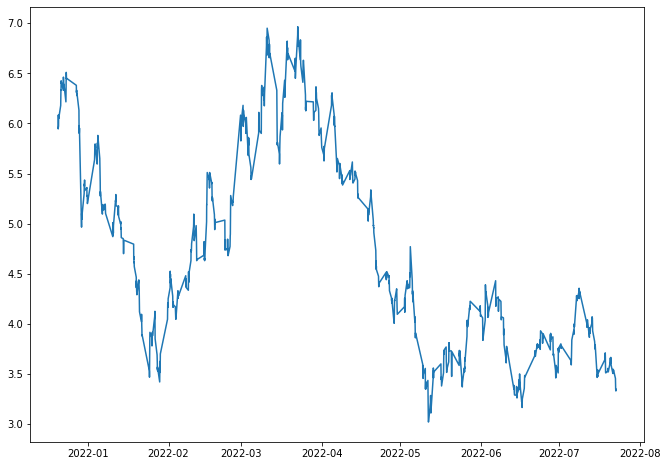

RSI 38.81733136225614
FSLY Precent Change:  14.611569294984836 
 Percent_mean:  1.4117458256023996 
 Varience:  2.870037712984633


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

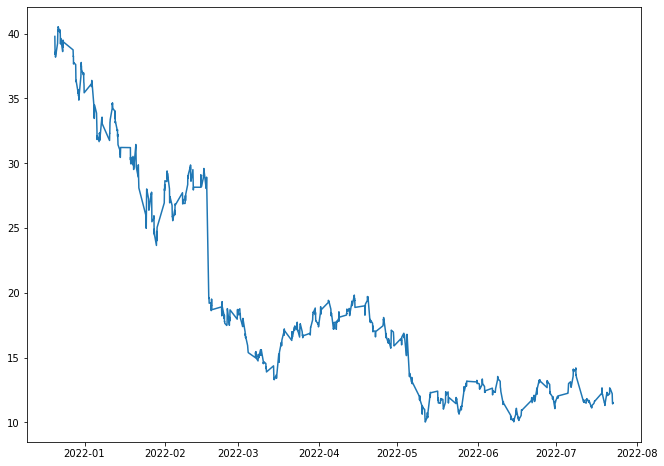

RSI 54.60576970138115
ELAN Precent Change:  6.034016222396033 
 Percent_mean:  0.5829967364633848 
 Varience:  1.6410765317303244


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

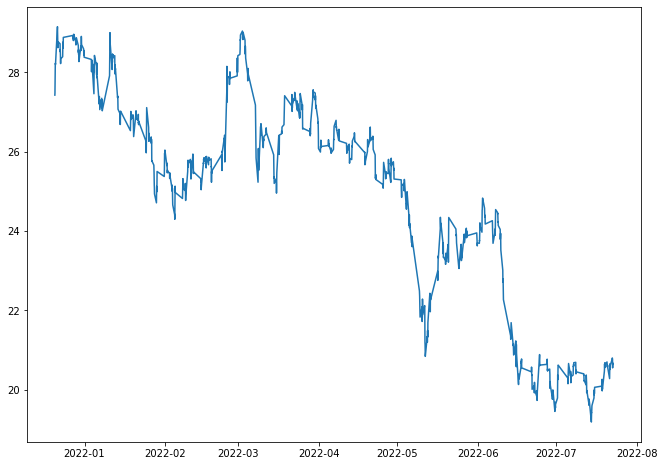

RSI 49.93986462862786
HOOD Precent Change:  13.85831642819933 
 Percent_mean:  1.338967770840515 
 Varience:  1.712798752896987


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

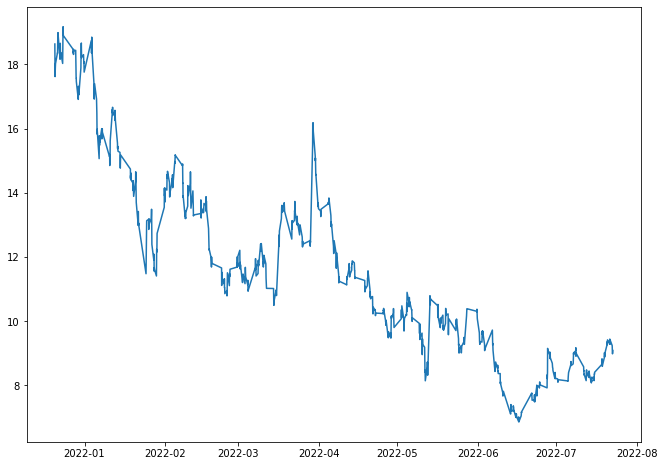

RSI 45.5385518294547
FOUR Precent Change:  12.848336011301962 
 Percent_mean:  1.2413851218649237 
 Varience:  3.0612114182253385


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

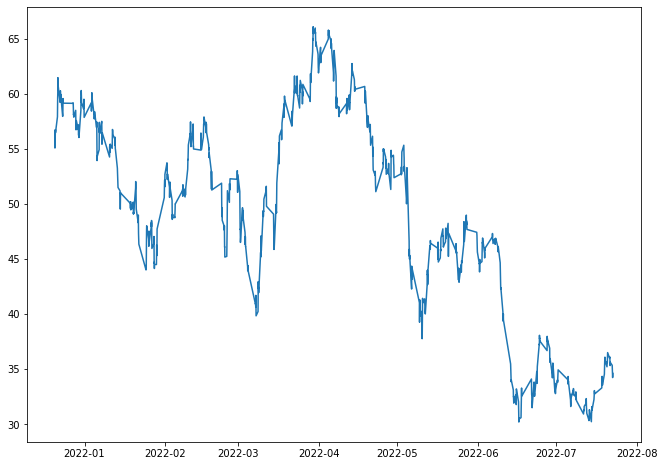

RSI 68.38902947298938
CWH Precent Change:  9.457599837055152 
 Percent_mean:  0.9137777620343143 
 Varience:  2.218112099119154


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

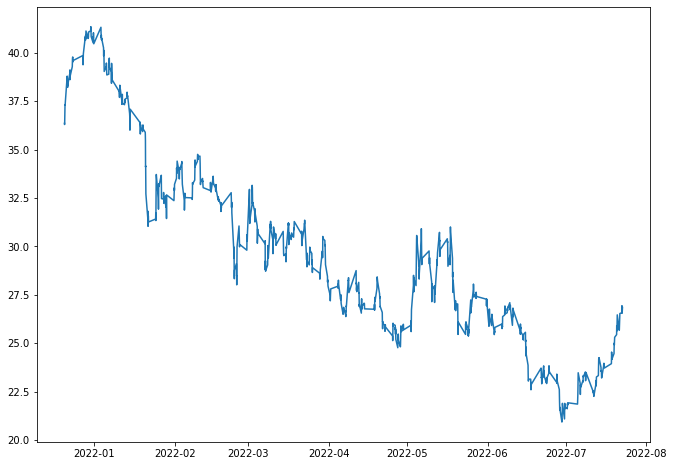

RSI 28.576111723592504
UAL Precent Change:  9.468957719521985 
 Percent_mean:  0.9148751419828004 
 Varience:  2.1226368335508456


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

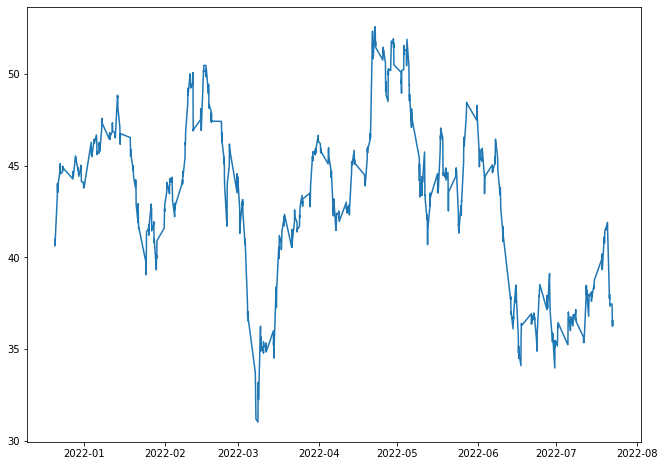

RSI 50.46059061208637
MANU Precent Change:  5.215690635899987 
 Percent_mean:  0.5039314624057959 
 Varience:  1.093875718377175


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

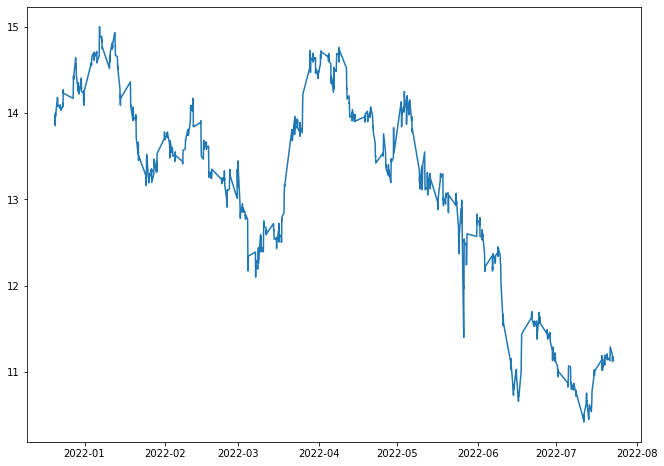

RSI 68.38698396490989
NWS Precent Change:  5.721179160005475 
 Percent_mean:  0.5527709333338623 
 Varience:  1.6497562449019965


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

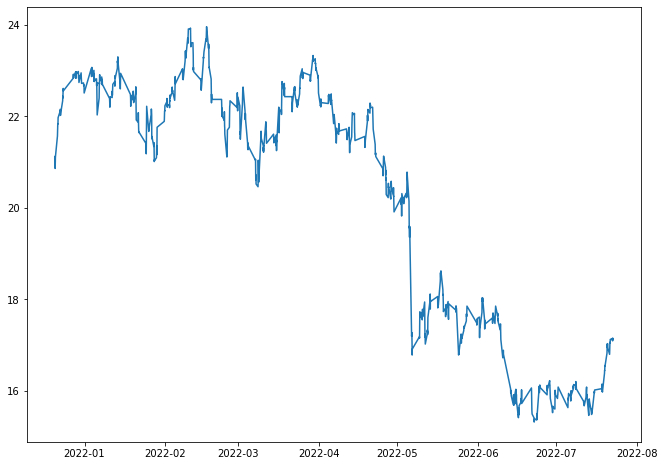

RSI 31.037446798524982
APRN Precent Change:  18.661986910950283 
 Percent_mean:  1.8030905227971288 
 Varience:  1.2854023879525622


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

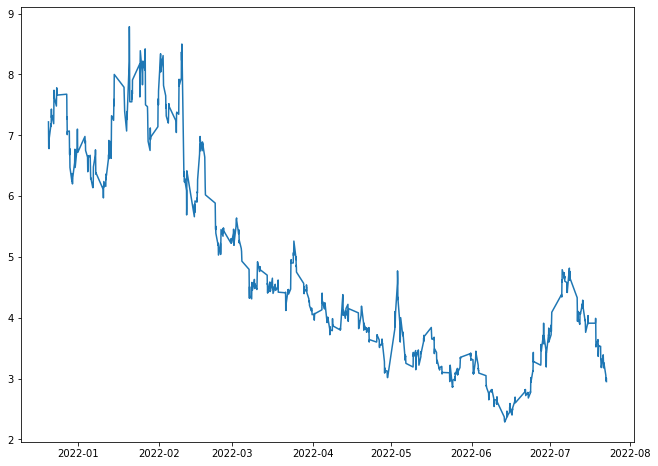

RSI 39.70827214609159
YUMC Precent Change:  7.901708630676913 
 Percent_mean:  0.7634501092441461 
 Varience:  1.965252881711433


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

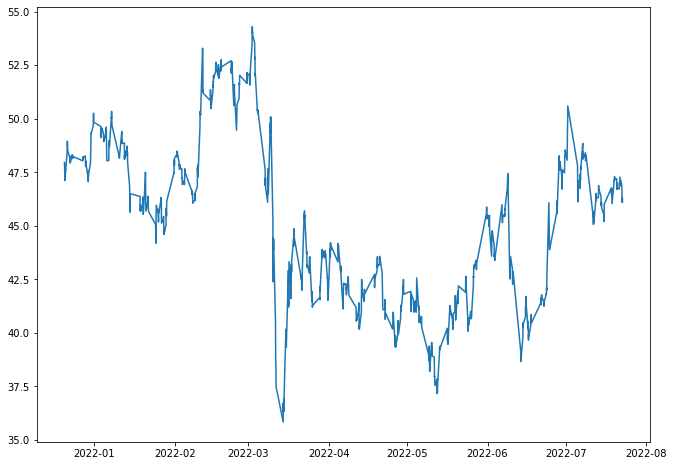

RSI 42.443973973859656
METV Precent Change:  6.154432878072746 
 Percent_mean:  0.733543847207717 
 Varience:  1.2782408958097302


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

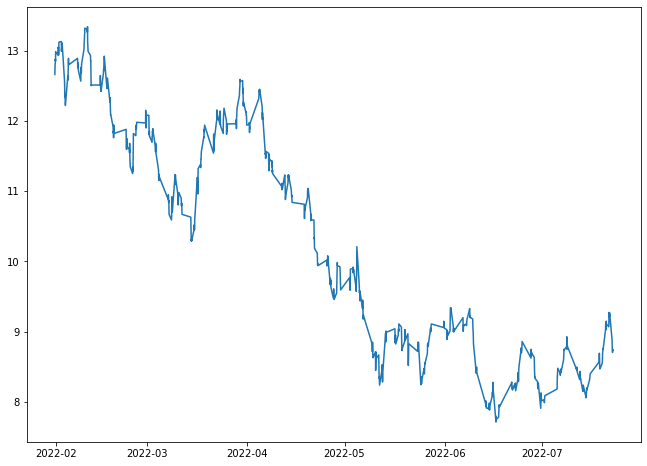

RSI 43.0122368345908
RUN Precent Change:  14.531639092895698 
 Percent_mean:  1.4040231007628694 
 Varience:  2.0373967695131436


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

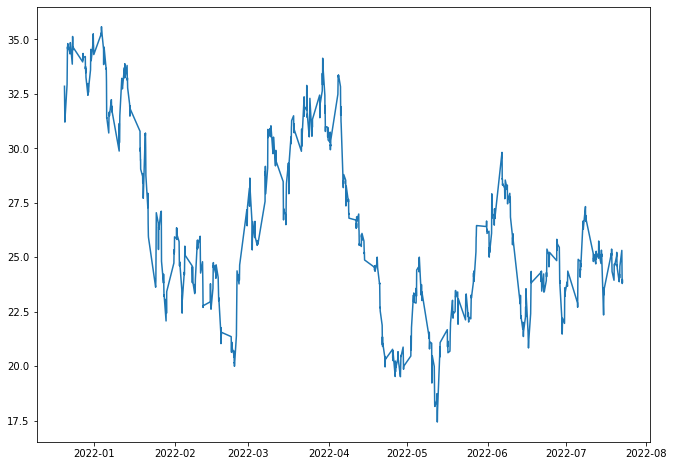

RSI 42.00627856064282
FRPT Precent Change:  11.68878087671231 
 Percent_mean:  1.1293508093441846 
 Varience:  4.446964870613714


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

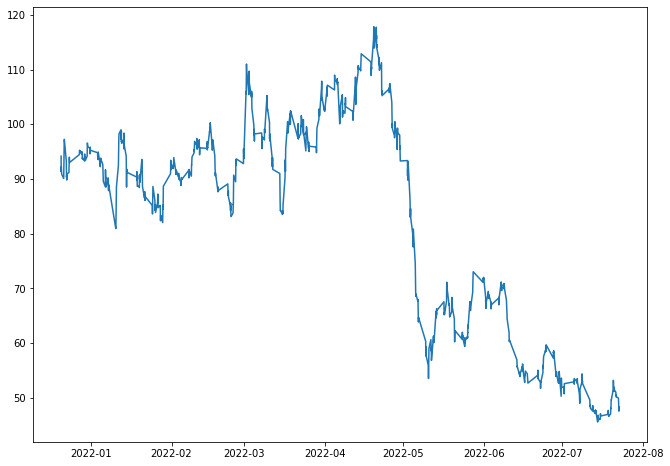

RSI 43.779707926231346
TDOC Precent Change:  14.383658897821665 
 Percent_mean:  1.3897254973740738 
 Varience:  4.519665713251334


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

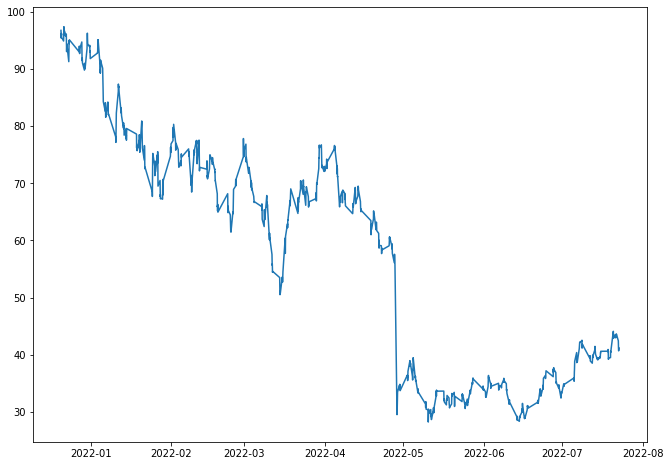

RSI 36.25323239985858
LMND Precent Change:  16.23152454298367 
 Percent_mean:  1.5682632408679877 
 Varience:  2.674457578193544


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

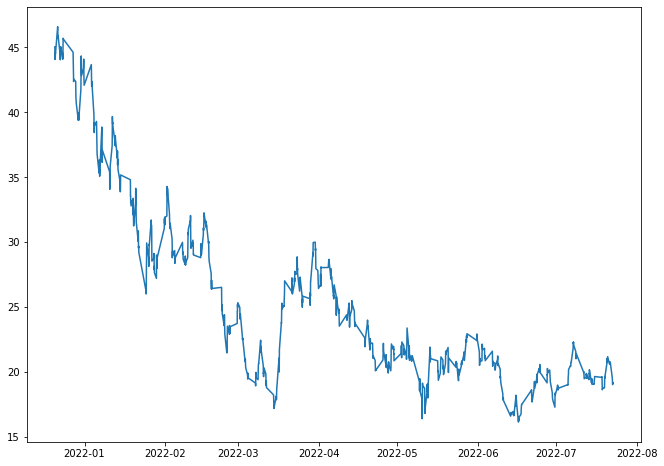

RSI 41.33741260069611
FRSH Precent Change:  14.79582559977493 
 Percent_mean:  1.4295483671280127 
 Varience:  2.002939289588031


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

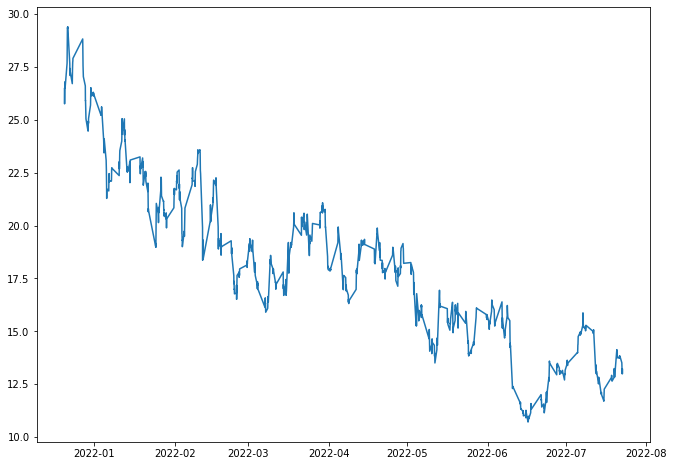

RSI 56.321182029729215
PPL Precent Change:  3.7154487590920566 
 Percent_mean:  0.3589805564340151 
 Varience:  1.1926791926894234


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

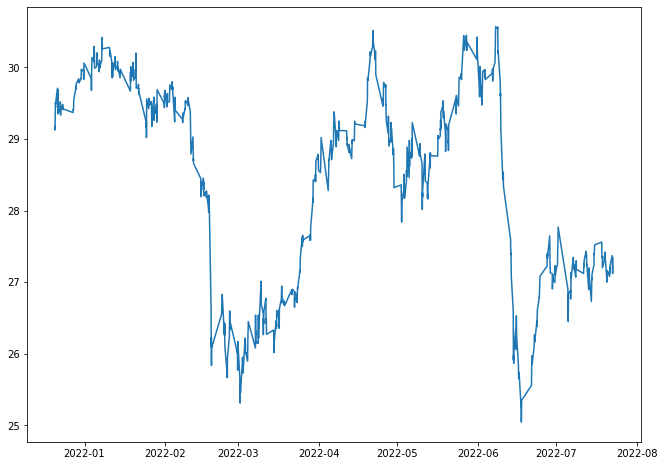

RSI 53.30413913591376
MTCH Precent Change:  9.585345930152478 
 Percent_mean:  0.9261203797248772 
 Varience:  4.531534112142081


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

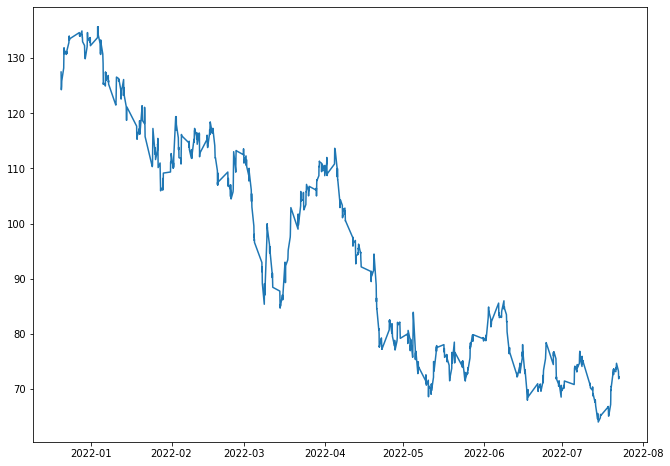

RSI 65.15248205970929
SWK Precent Change:  6.232612896325976 
 Percent_mean:  0.6021848209010605 
 Varience:  5.269964771402683


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

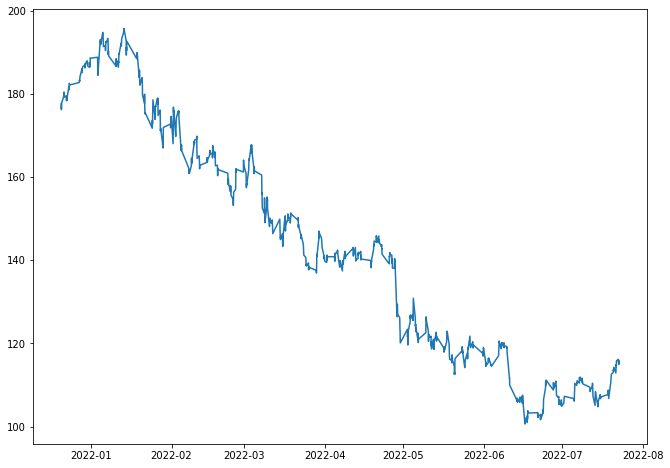

RSI 54.745745520861
WAB Precent Change:  5.591551617345845 
 Percent_mean:  0.5402465330768932 
 Varience:  2.07768547295816


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

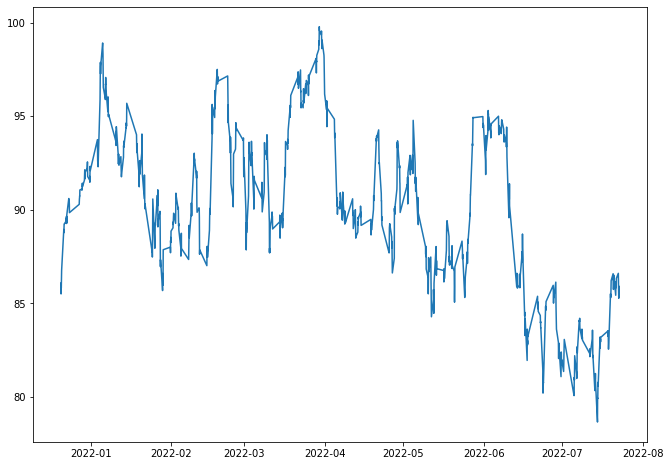

RSI 68.28048924987598
LVS Precent Change:  8.892300108820248 
 Percent_mean:  0.8591594308038887 
 Varience:  2.1011980156587966


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

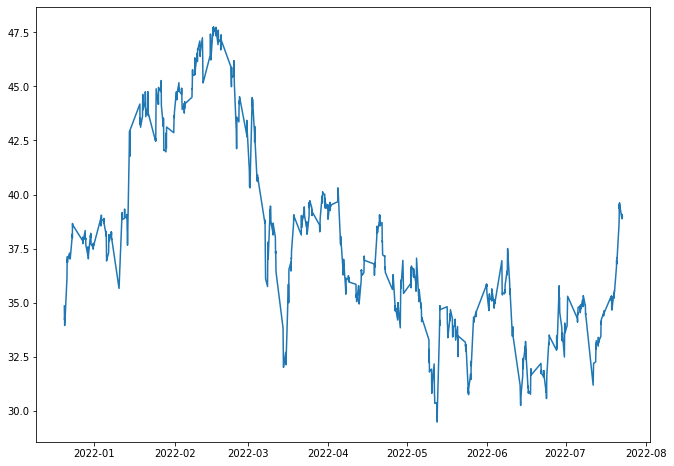

RSI 37.91353269371549
W Precent Change:  15.11455550966275 
 Percent_mean:  1.4603435275036474 
 Varience:  6.901358175985061


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

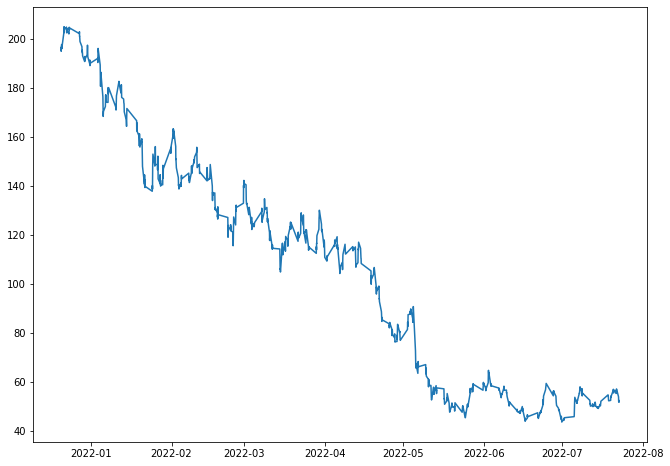

RSI 43.1712551609975
ROKU Precent Change:  14.678666837778973 
 Percent_mean:  1.4182286799786448 
 Varience:  6.474406208772849


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

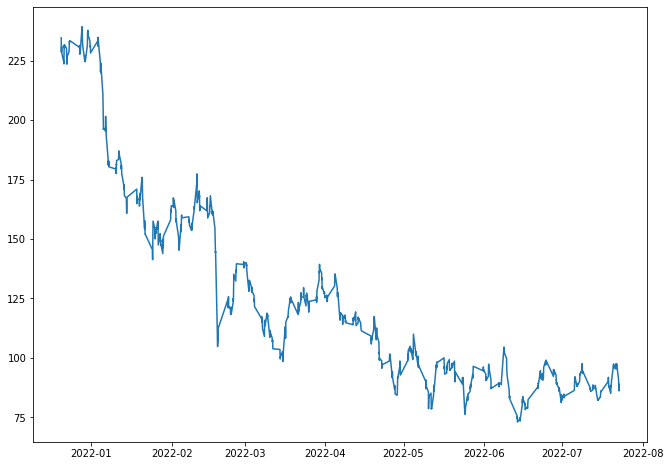

RSI 56.3112147305656
UPWK Precent Change:  11.588442290597534 
 Percent_mean:  1.1196562599611144 
 Varience:  2.144693843823843


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

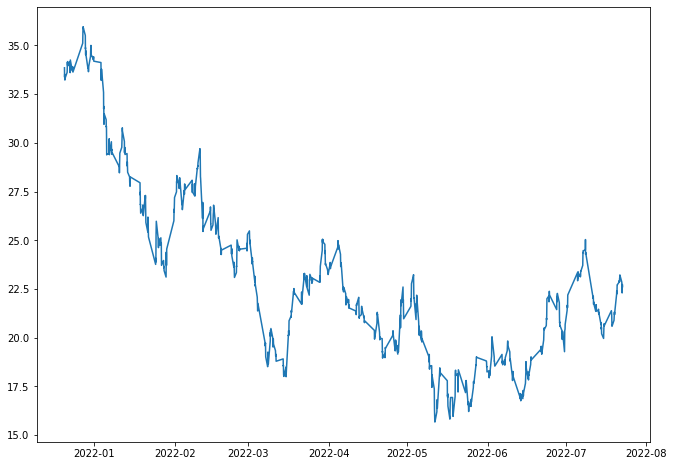

RSI 58.19974506919166
OGN Precent Change:  5.651341837837698 
 Percent_mean:  0.5460233659746568 
 Varience:  1.519140476084196


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

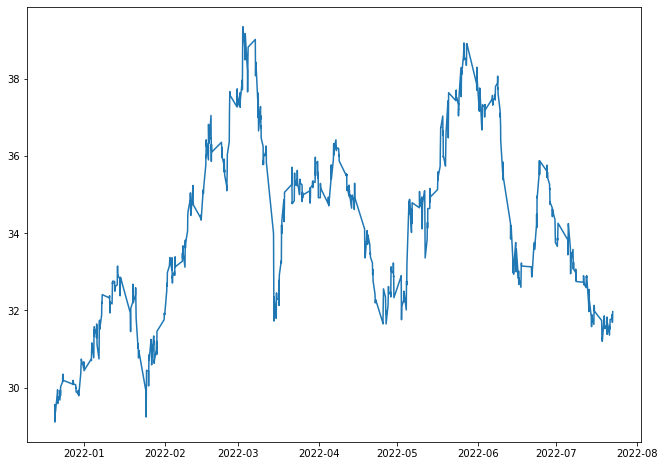

RSI 58.19974506919166
OGN Precent Change:  5.651341837837698 
 Percent_mean:  0.5460233659746568 
 Varience:  1.519140476084196


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

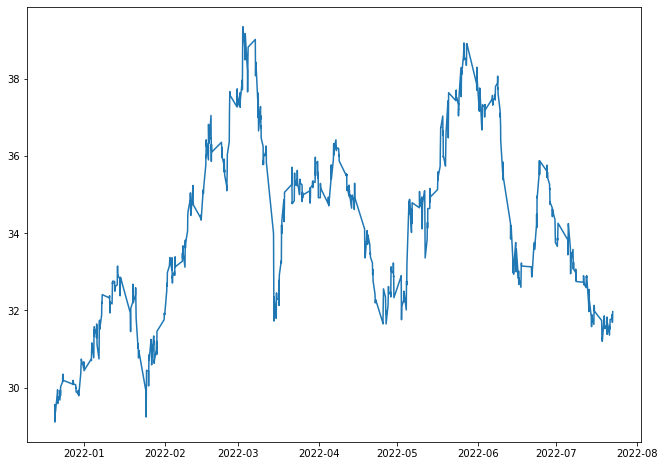

RSI 58.19974506919166
OGN Precent Change:  5.651341837837698 
 Percent_mean:  0.5460233659746568 
 Varience:  1.519140476084196


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

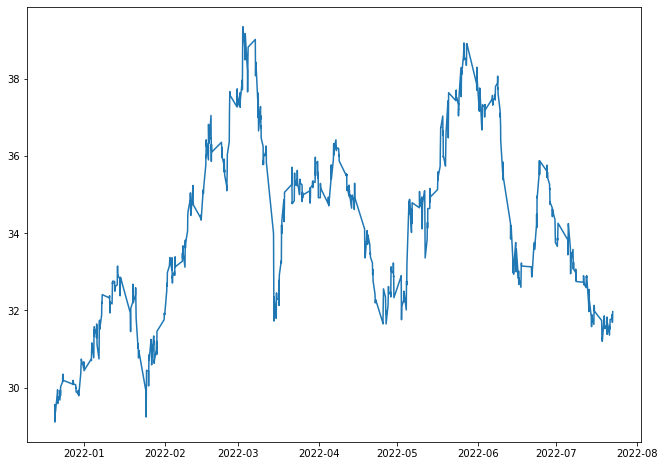

RSI 44.34512570084961
FANG Precent Change:  9.15679210778362 
 Percent_mean:  0.8847142133124271 
 Varience:  3.5107963895472127


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

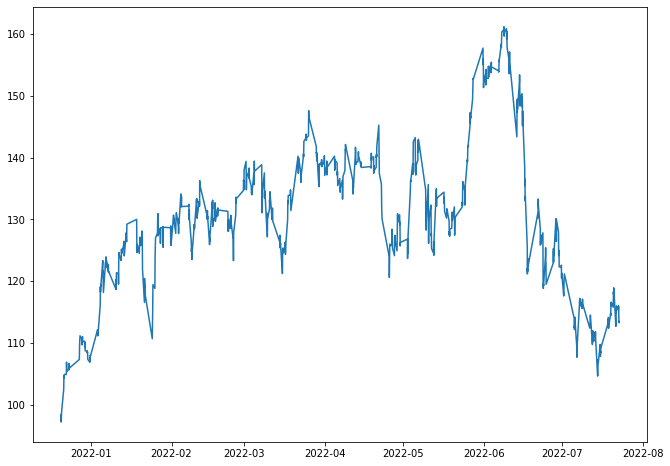

RSI 56.321182029729215
PPL Precent Change:  3.7154487590920566 
 Percent_mean:  0.3589805564340151 
 Varience:  1.1926791926894234


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

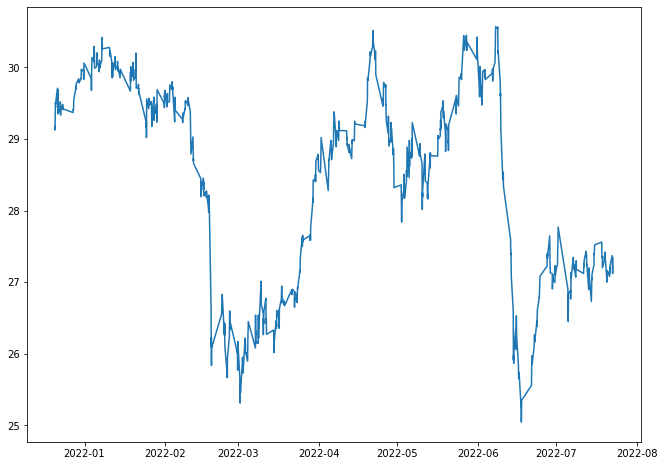

RSI 50.42424749101131
MPWR Precent Change:  9.843969359381937 
 Percent_mean:  0.9511081506649215 
 Varience:  5.934782123676914


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


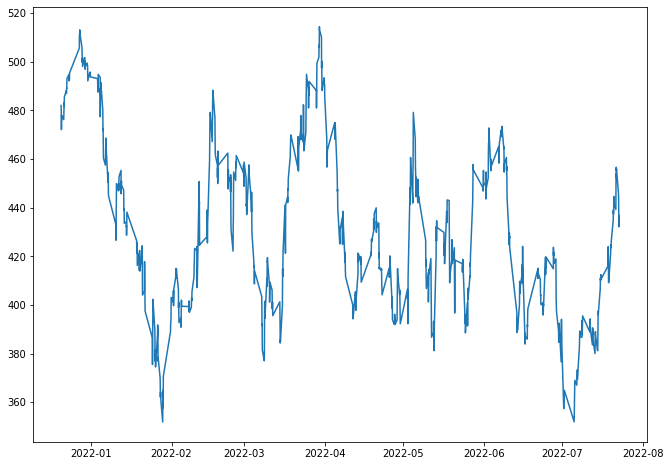

RSI 40.74791890494188
WRB Precent Change:  4.345017495208051 
 Percent_mean:  0.41980845364328995 
 Varience:  2.29911382073848


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

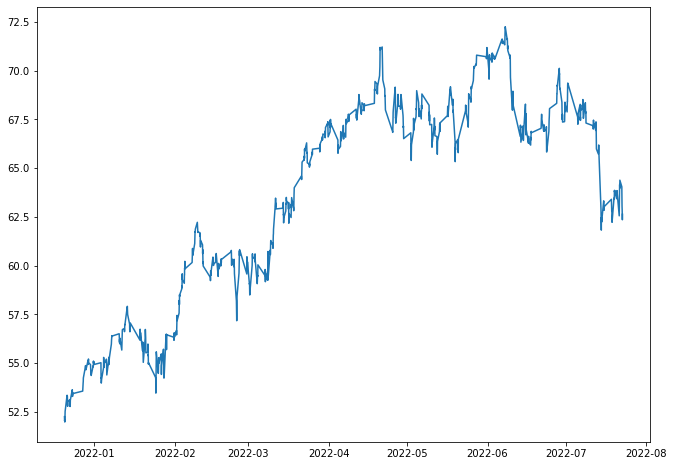

RSI 58.70044686902586
MA Precent Change:  6.130029346997338 
 Percent_mean:  0.5922733668596462 
 Varience:  4.451728508529478


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


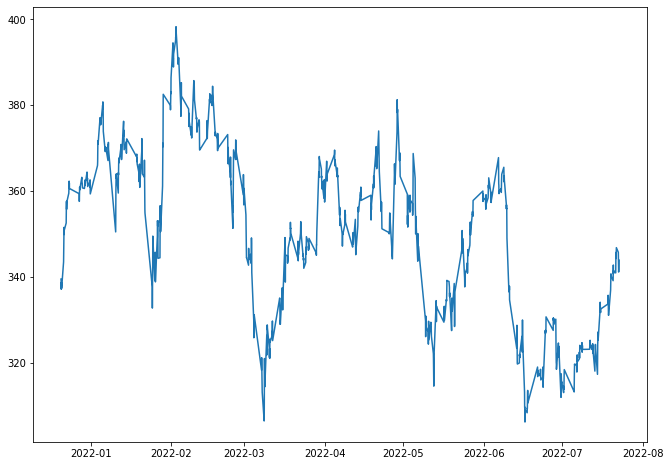

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 50.46059061208637
MANU Precent Change:  5.215690635899987 
 Percent_mean:  0.5039314624057959 
 Varience:  1.093875718377175


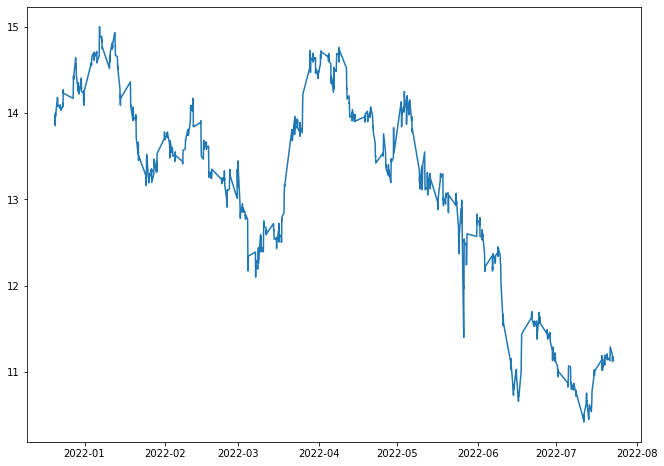

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 57.769856489975496
GM Precent Change:  7.546451948501928 
 Percent_mean:  0.7291257921257901 
 Varience:  2.971851057345673


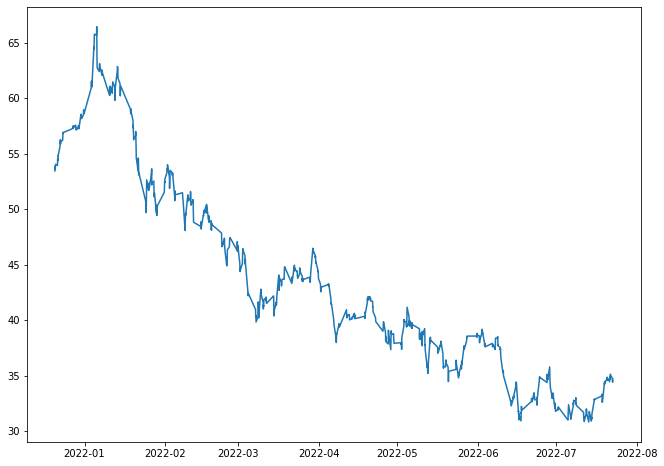

RSI 44.935465005942945
MRO Precent Change:  9.44745499411973 
 Percent_mean:  0.9127975839729207 
 Varience:  1.9847212918402992


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

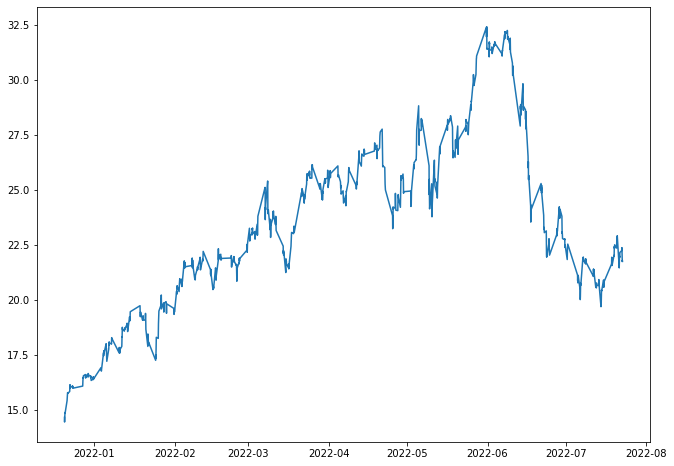

RSI 45.7003324652647
DOW Precent Change:  5.392576594091975 
 Percent_mean:  0.5210218931489831 
 Varience:  2.361078922243983


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

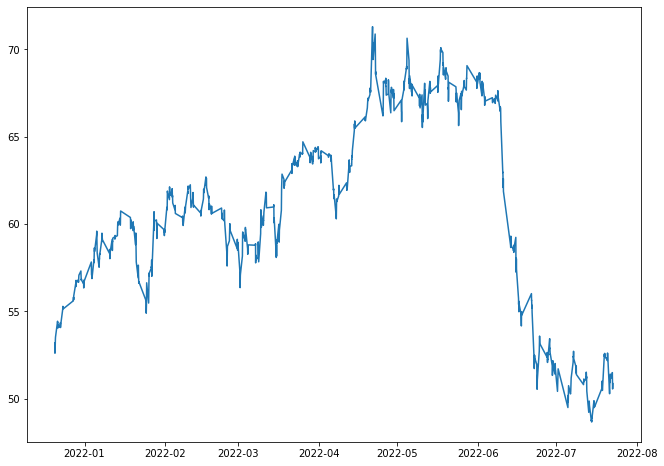

RSI 51.101078817066245
JNJ Precent Change:  3.1391467297369053 
 Percent_mean:  0.3032992009407638 
 Varience:  2.354436299397615


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

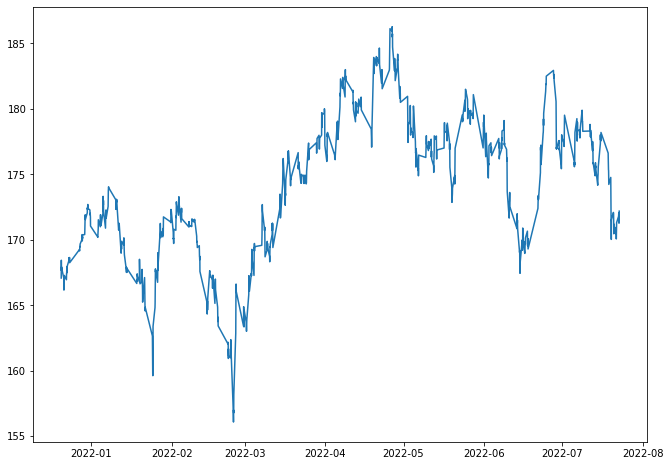

RSI 49.5966807029846
KO Precent Change:  3.481792922544237 
 Percent_mean:  0.33640511328929823 
 Varience:  1.432590134825891


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

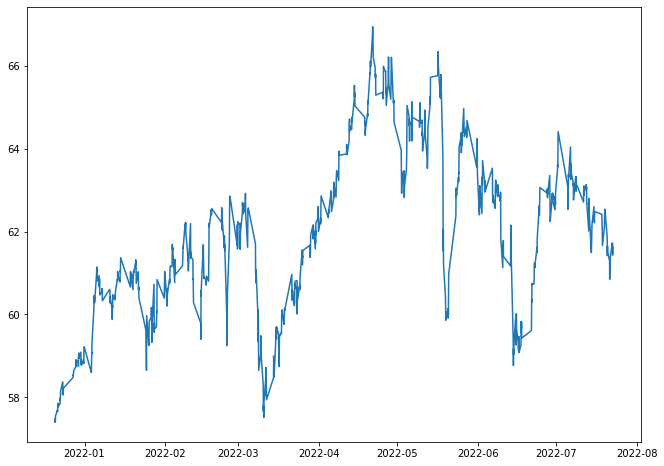

RSI 54.003181108584435
V Precent Change:  5.4453138863148745 
 Percent_mean:  0.5261172837019202 
 Varience:  3.239634281871171


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

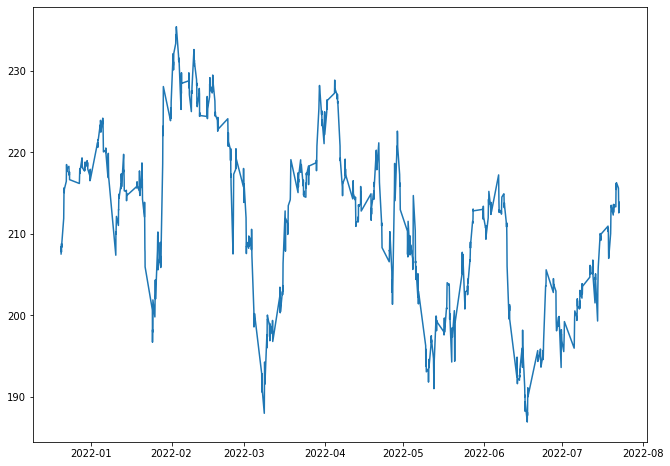

RSI 50.365564247490376
UNH Precent Change:  4.623375735002545 
 Percent_mean:  0.4467029695654633 
 Varience:  4.724746957727609


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


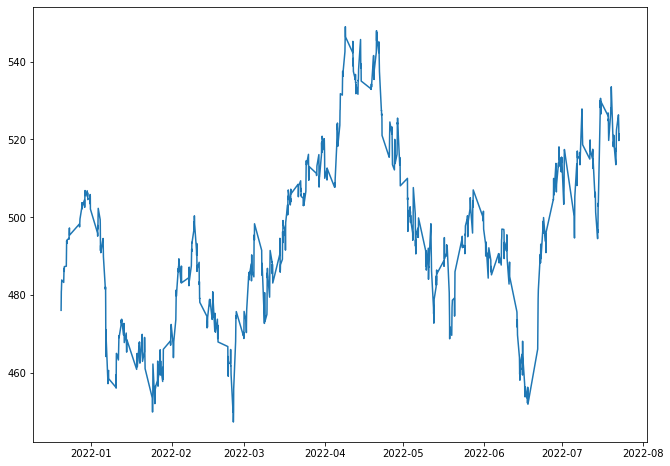

RSI 48.94420205389561
EMBC Precent Change:  5.906149446534373 
 Percent_mean:  1.0977972948948649 
 Varience:  1.5878937548273588


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

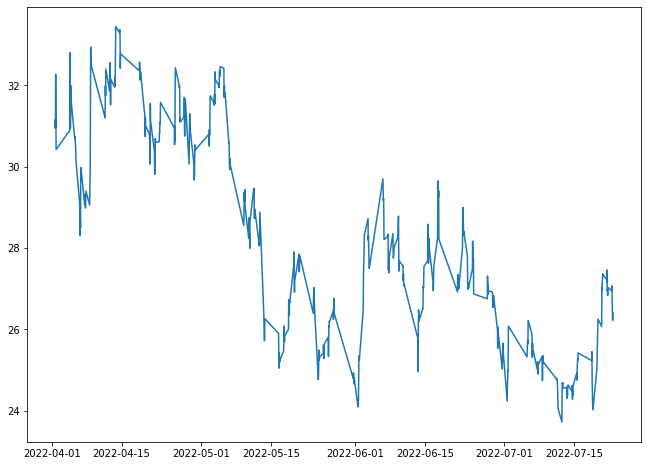

RSI 58.19974506919166
OGN Precent Change:  5.651341837837698 
 Percent_mean:  0.5460233659746568 
 Varience:  1.519140476084196


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

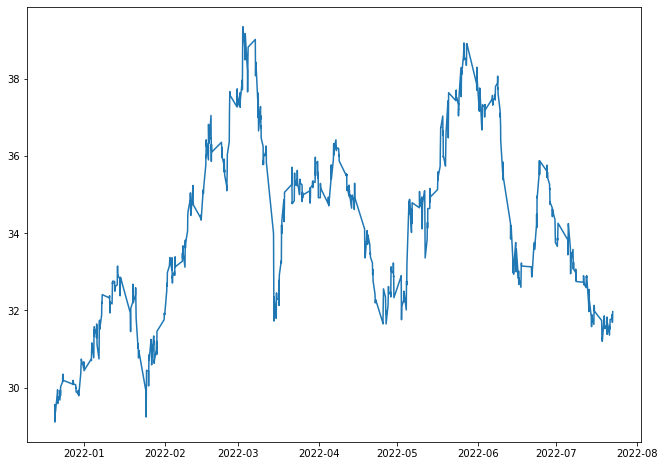

RSI 59.13116439763374
GL Precent Change:  4.644291083242335 
 Percent_mean:  0.4487237761586797 
 Varience:  1.9980728827886323


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

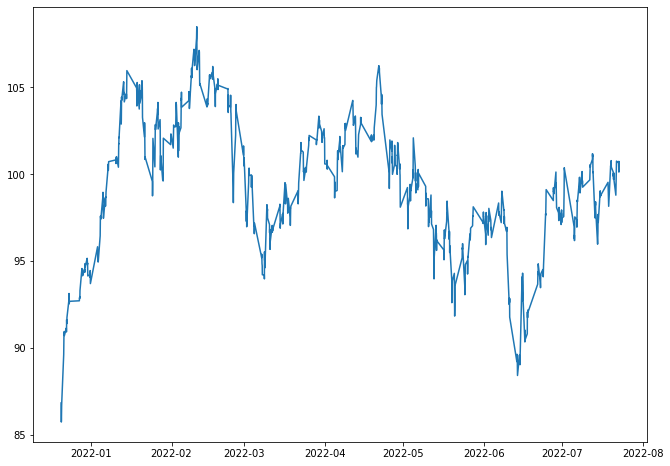

RSI 52.065076381724246
TAP Precent Change:  5.361746805469116 
 Percent_mean:  0.5180431696105426 
 Varience:  1.7997532899335085


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

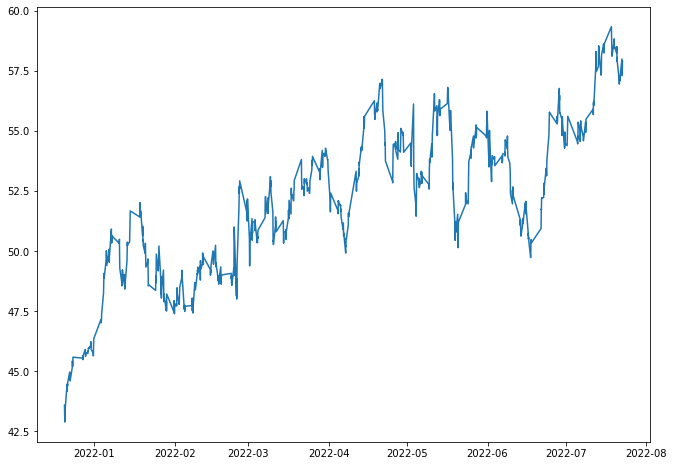

RSI 62.17435432480725
BDX Precent Change:  4.160257883386253 
 Percent_mean:  0.4019572834189616 
 Varience:  3.0443985571813386


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

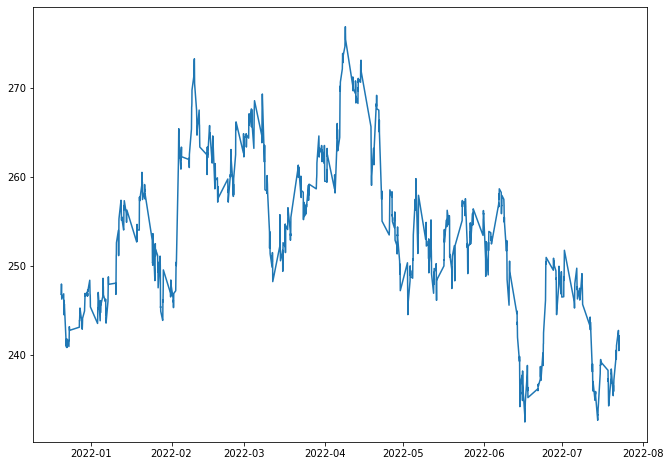

RSI 51.47868433926795
RTX Precent Change:  4.656915973769253 
 Percent_mean:  0.4499435723448554 
 Varience:  2.204977072960927


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

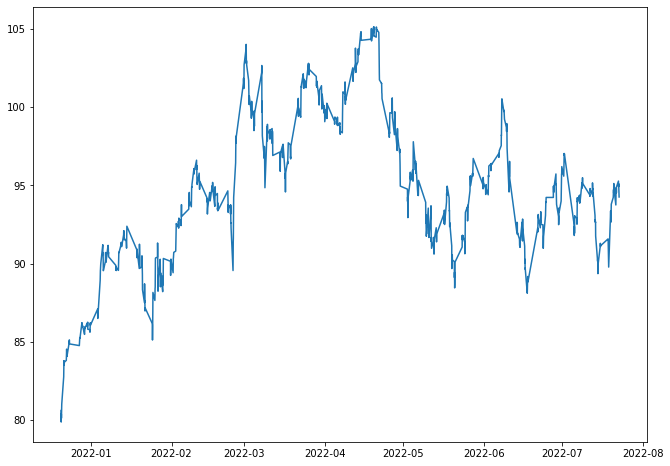

RSI 36.718334787243585
CLF Precent Change:  10.385147959258486 
 Percent_mean:  1.0033959380926074 
 Varience:  2.255506902140434


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

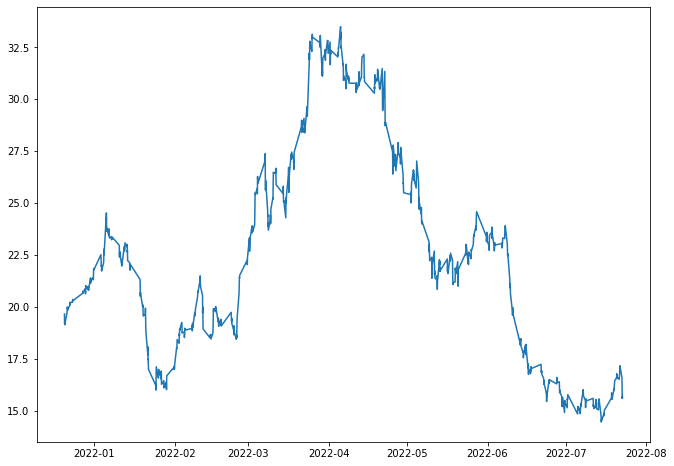

RSI 43.6097400272978
NRG Precent Change:  5.389688929479103 
 Percent_mean:  0.5207428917371114 
 Varience:  1.6935864714721158


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

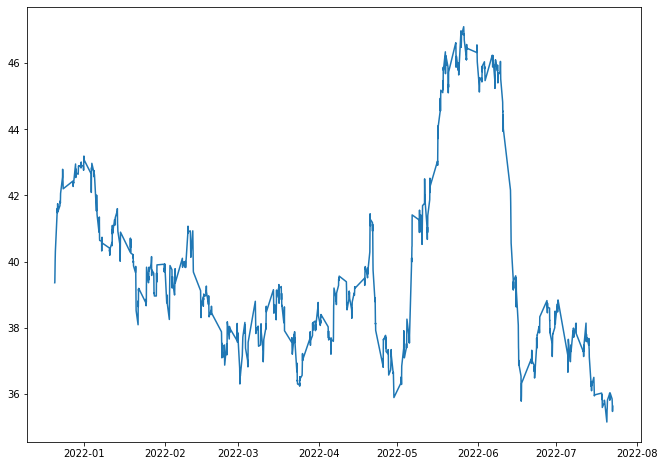

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 49.175858493078785
HST Precent Change:  7.067022307414449 
 Percent_mean:  0.6828040876728937 
 Varience:  1.222974340788549


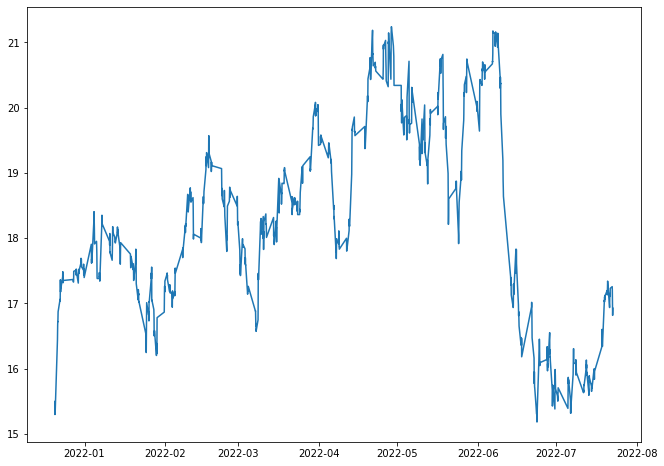

RSI 44.52911283121611
ARKK Precent Change:  11.63871652757862 
 Percent_mean:  1.1245136741621855 
 Varience:  4.099226346370784


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

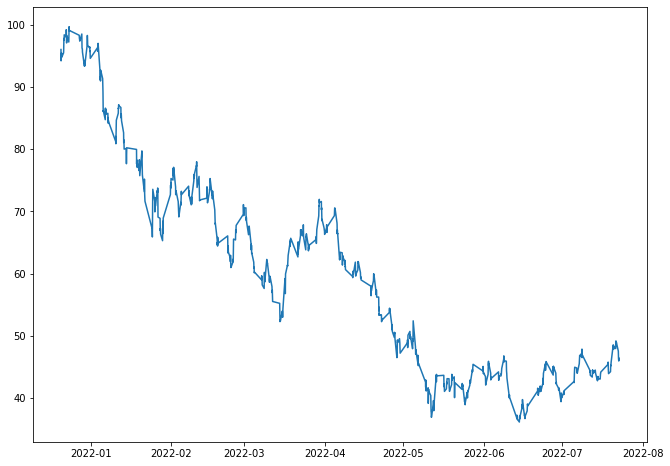

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 55.991685843833956
QLYS Precent Change:  7.218313607899978 
 Percent_mean:  0.6974216046280172 
 Varience:  2.915566179103384


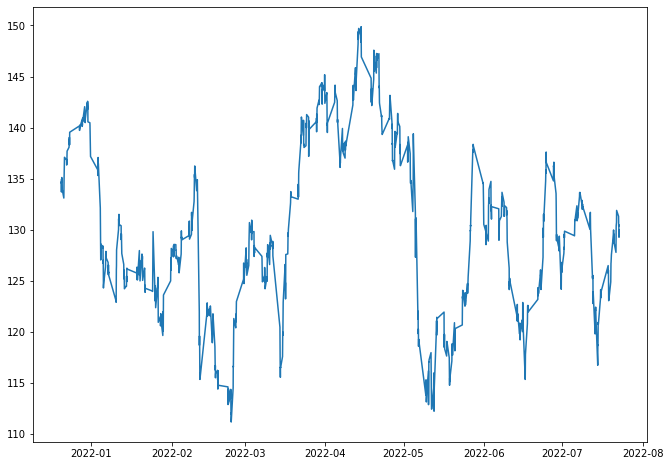

RSI 43.471065984182836
ESTE Precent Change:  13.947232047112582 
 Percent_mean:  1.3475586518949356 
 Varience:  1.5438679282116816


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

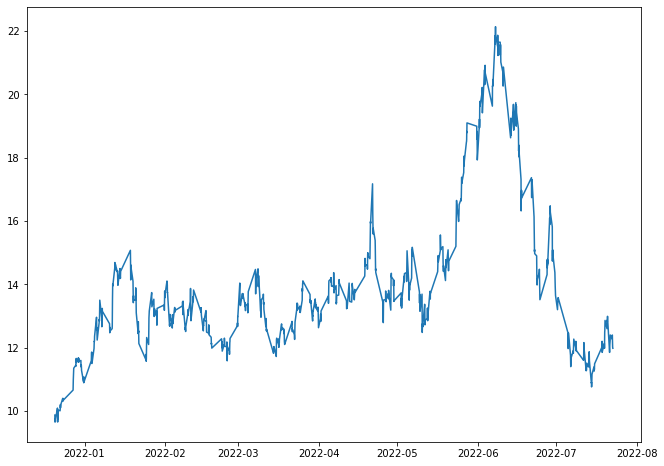

RSI 53.21780182522847
ULTA Precent Change:  6.35600124886979 
 Percent_mean:  0.6141064008569845 
 Varience:  4.50939427541842


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


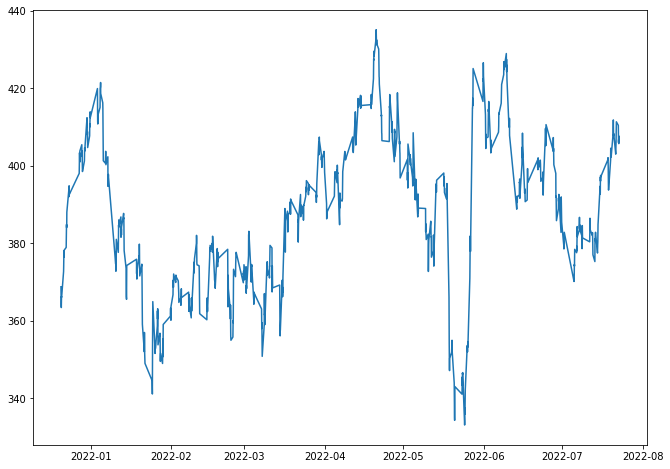

RSI 54.73352426797442
DG Precent Change:  4.936538865591979 
 Percent_mean:  0.4769602768687903 
 Varience:  4.231495631273872


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

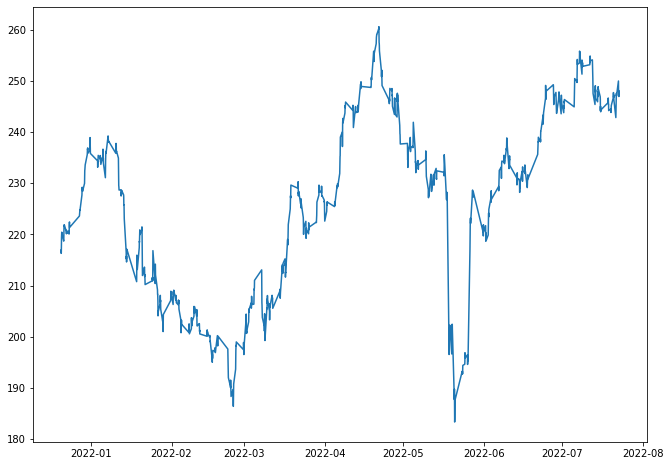

RSI 56.78142730790289
KMB Precent Change:  3.81747206340014 
 Percent_mean:  0.36883788052175265 
 Varience:  2.612387334030561


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

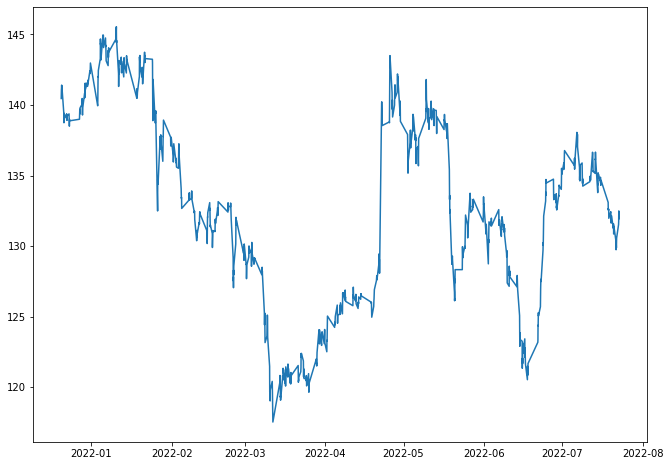

RSI 50.14758449191565
GIS Precent Change:  3.847155212239917 
 Percent_mean:  0.3717058176077215 
 Varience:  1.7744315865565865


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

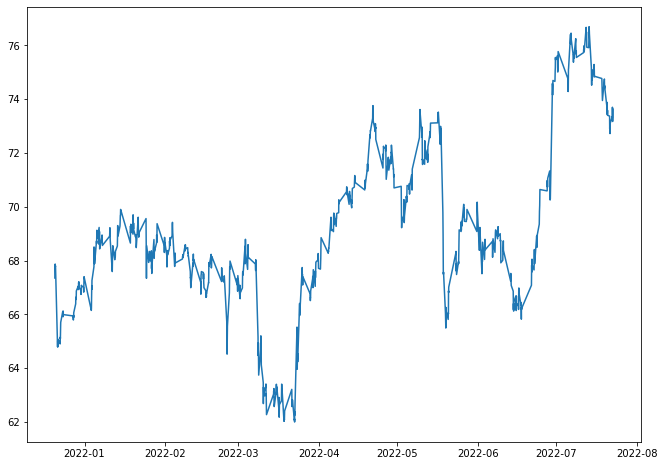

RSI 56.272895548041674
LIN Precent Change:  4.922165580576481 
 Percent_mean:  0.475571553678887 
 Varience:  4.372033612261142


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

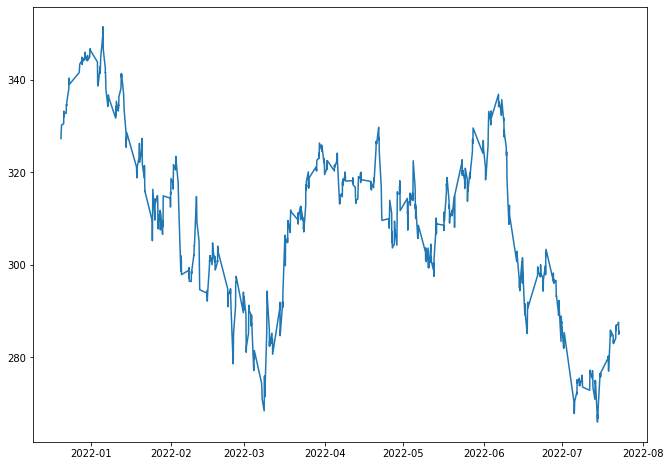

RSI 53.177384494086446
PFE Precent Change:  5.086127978350543 
 Percent_mean:  0.4914133312415984 
 Varience:  1.7208244011118468


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

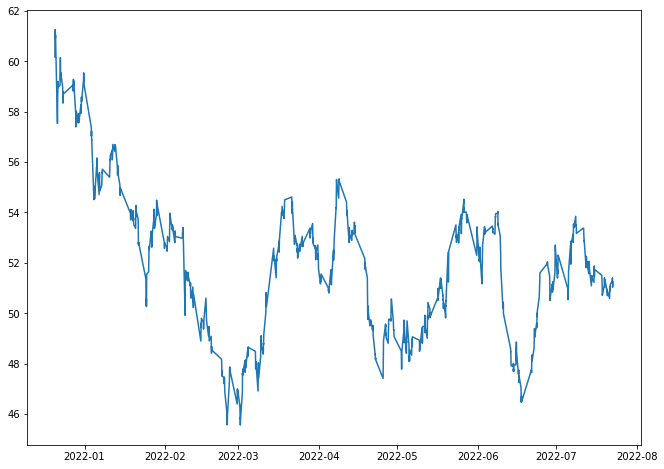

RSI 50.47260617994631
BJ Precent Change:  6.813946632378602 
 Percent_mean:  0.6583523316307829 
 Varience:  1.9633616159691245


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

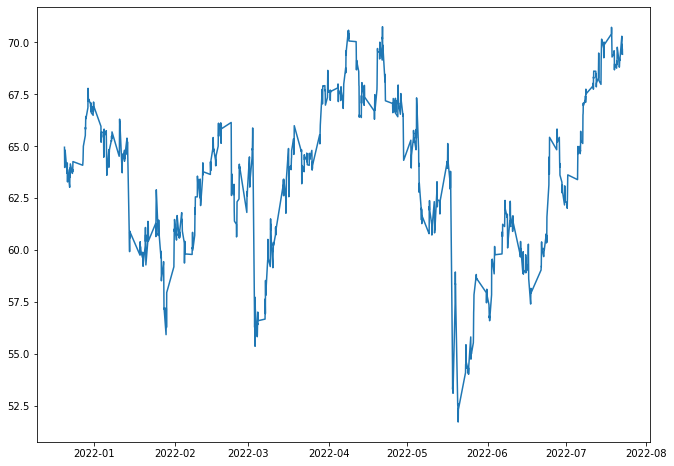

RSI 40.54335769927249
AZN Precent Change:  4.229710593886647 
 Percent_mean:  0.4086676902305939 
 Varience:  1.992956764364549


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

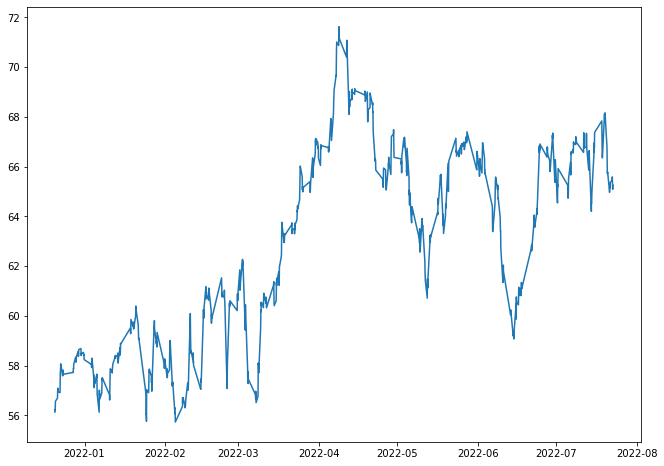

RSI 58.51152960853715
TMO Precent Change:  5.137788870629644 
 Percent_mean:  0.49640472179996564 
 Varience:  6.006352573550971


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


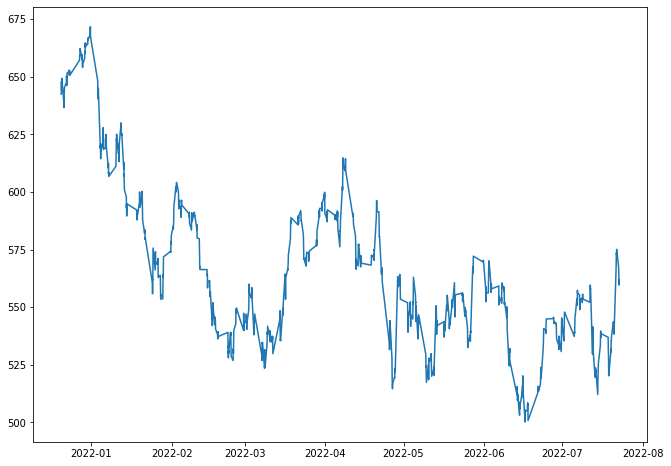

RSI 54.76811046446592
DUK Precent Change:  3.5310431453688147 
 Percent_mean:  0.3411635889245232 
 Varience:  2.1572058544004897


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

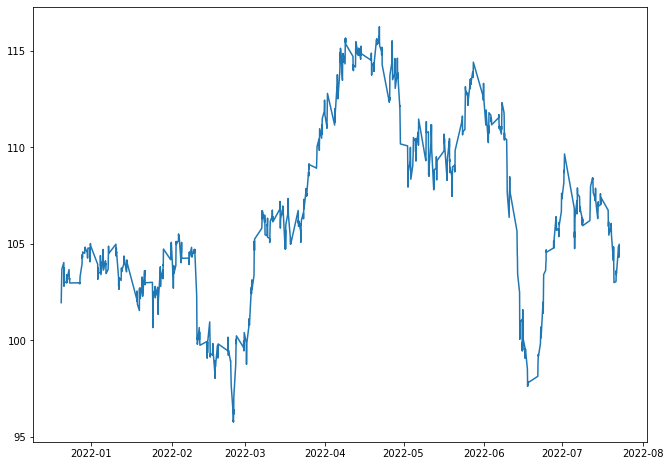

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 63.26047493052144
MDLZ Precent Change:  3.629625652540772 
 Percent_mean:  0.35068846884451904 
 Varience:  1.5816616375542765


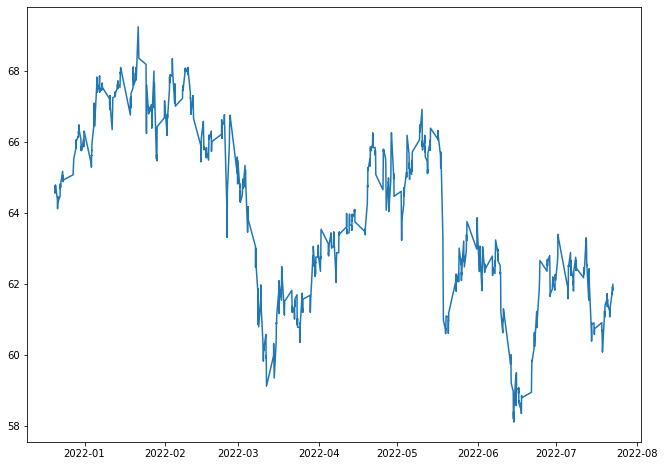

RSI 49.015432983735664
CB Precent Change:  4.446686222469378 
 Percent_mean:  0.4296315190791669 
 Varience:  2.975383655058411


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

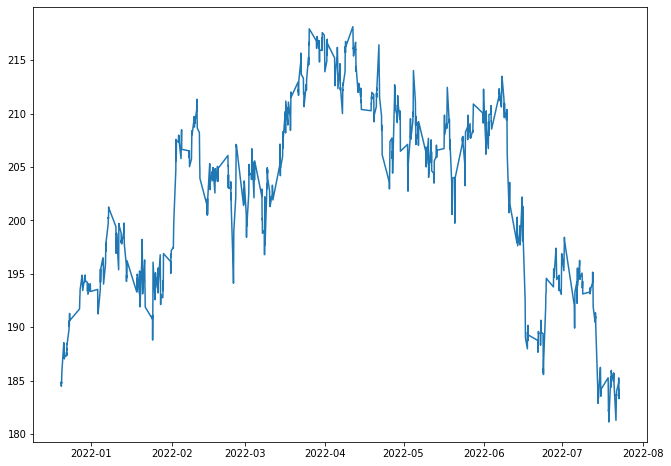

RSI 59.78523830295259
ADI Precent Change:  6.128183311130655 
 Percent_mean:  0.5920950059063435 
 Varience:  2.8360457862982322


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

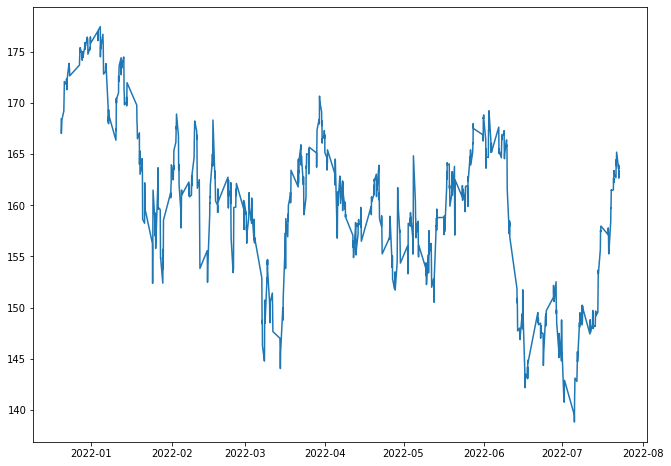

RSI 44.29650588866676
EOG Precent Change:  7.88750630839721 
 Percent_mean:  0.7620779041929672 
 Varience:  3.6053981848466172


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

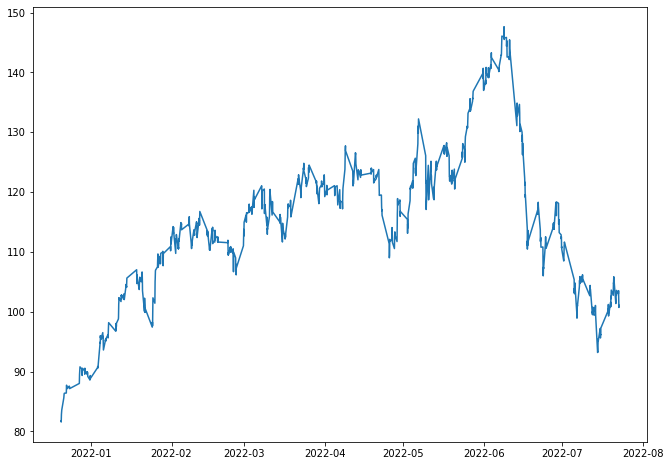

RSI 44.501032944637345
BTI Precent Change:  3.768486920574304 
 Percent_mean:  0.3641050164806091 
 Varience:  1.4631884638260106


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

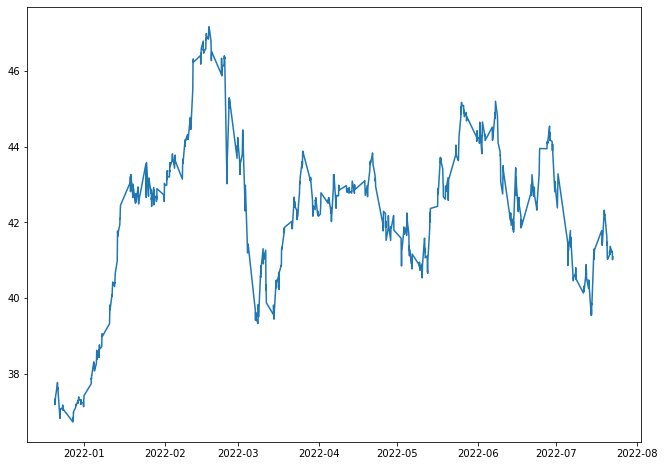

RSI 50.963518214839375
ADM Precent Change:  5.183855646139811 
 Percent_mean:  0.5008556179845228 
 Varience:  2.9569398936755698


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

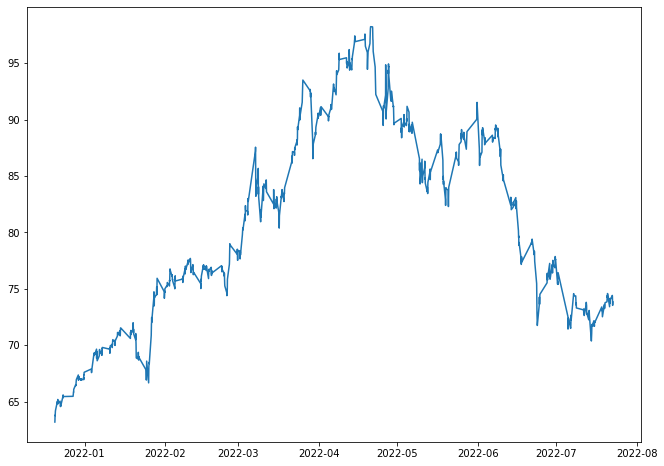

RSI 52.94338014366637
CCI Precent Change:  4.85871129409306 
 Percent_mean:  0.46944070474329075 
 Varience:  3.3923554793788933


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

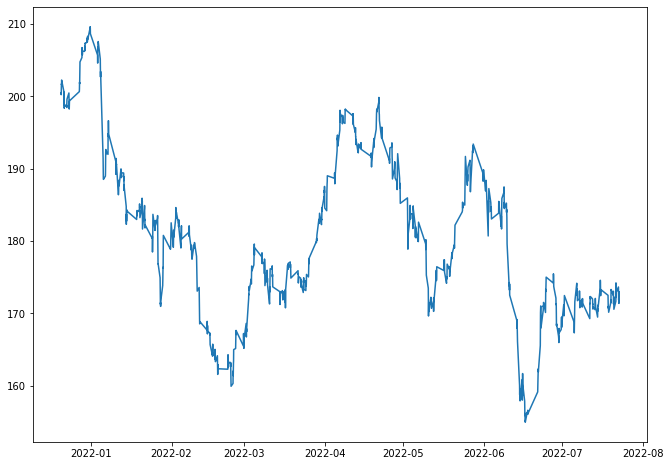

RSI 42.772632513844606
NOC Precent Change:  4.869286575086394 
 Percent_mean:  0.47046247102284006 
 Varience:  5.842218518171041


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


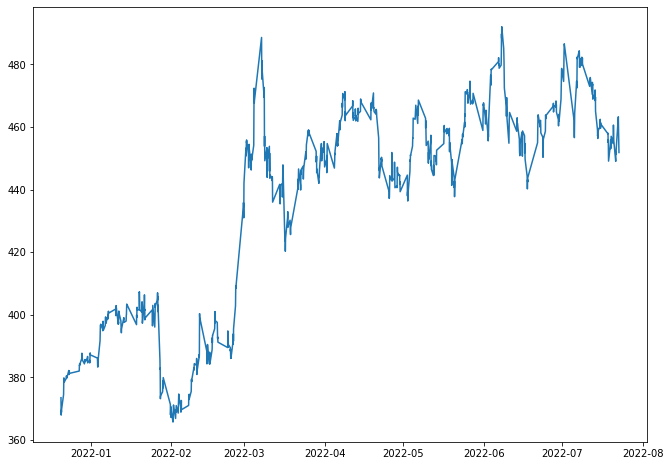

RSI 62.37696424620826
CL Precent Change:  3.4839446666155505 
 Percent_mean:  0.33661301126720294 
 Varience:  1.7624087473423338


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

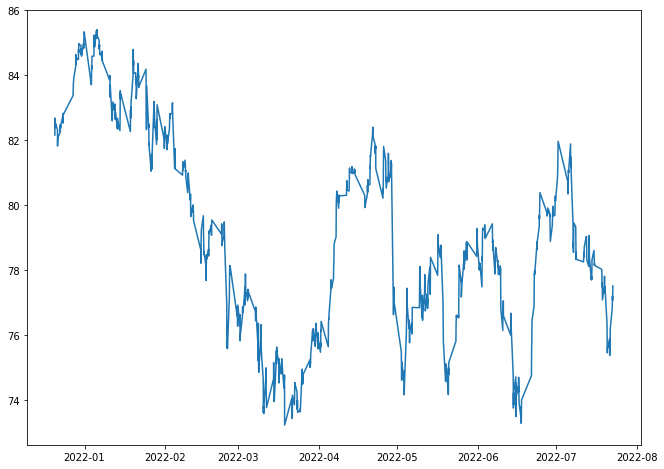

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

RSI 55.85890328820202
AON Precent Change:  4.728438497219229 
 Percent_mean:  0.4568539610839835 
 Varience:  4.677646837222003


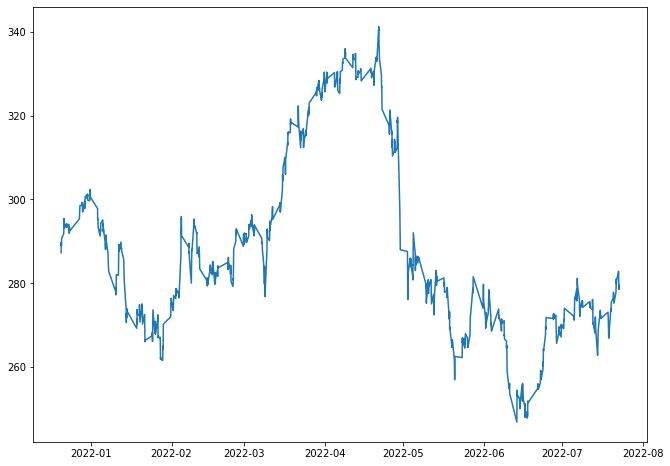

RSI 43.41077127062087
PXD Precent Change:  7.259835425867491 
 Percent_mean:  0.7014333744799509 
 Varience:  5.099547894448844


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\P

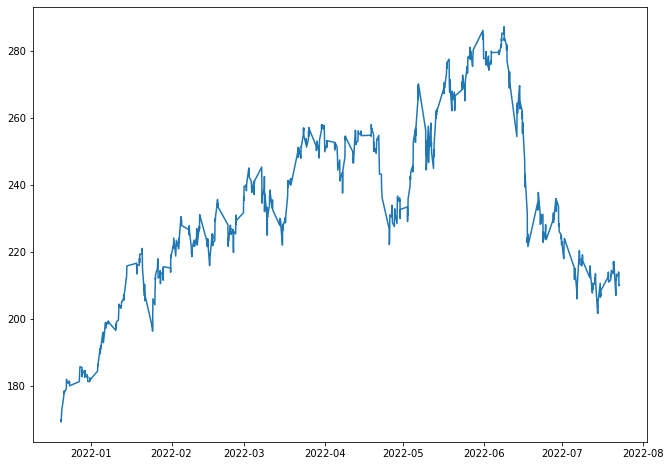

RSI 56.85725300667266
KLAC Precent Change:  8.297673420786118 
 Percent_mean:  0.8017075768875478 
 Varience:  5.954655047678407


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


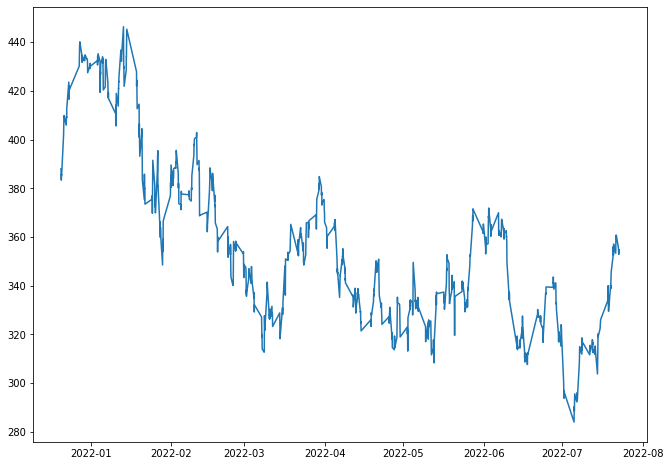

- AEP: No data found for this date range, symbol may be delisted


C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


IndexError: index 13 is out of bounds for axis 0 with size 0

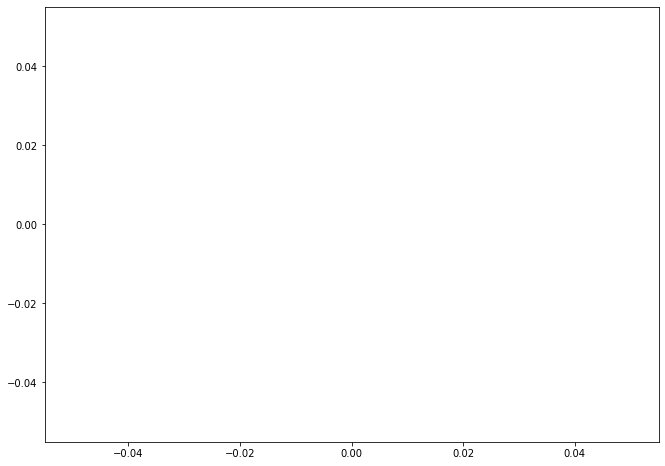

In [17]:
x = datetime.datetime.now()
# first = '2021-12-11'
# second = '2022-03-03'
first = '2021-12-19'
second = str(x)[:10]
figsize(11, 8)

#Day Charts

# for numb0, i in enumerate(p_changes.sort_values(by=['Percent_Change'])[::-1]['Equity']):
# for numb0, i in enumerate(p_changes.sort_values(by=['Varience'])[::-1]['Equity'][:40]):
# for numb0, i in enumerate(downward_earnings):
for numb0, i in enumerate(total):
    try:
        #get data on this ticker
        tk = yf.Ticker(i)

        #get the historical prices for this ticker year-month-day
        sus = tk.history(period='1d', interval = "1h",
                                      start=first, end=second)
    #         print(first)
    #     goo = tk.option_chain('2023-01-20')[0]

    #         za = pd.DataFrame()

    #         sus = tk.history(period = "10y", interval = "1d")
        ss = sus['Close']
        plt.plot(ss[-3340:])
    #         p = ''.join(str(n).split('.')[0]+'.'+str(n).split('.')[1][:2])

    #     za['price'] = [p for x in range(len(goo['bid'])) ]
    #     za['price_'] = p
    #     za['strike'] = goo['strike']
    #     za['bid'] = goo['bid']
    #     za['ask'] = goo['ask']
    #     za['spread'] = [(goo['bid'][x] / goo['ask'][x]) for x in range(len(goo))]


        last3 = ss[-3340:]

        p_c = np.sum(np.abs(last3.pct_change()))
        p_c_not_absolute_sum = np.sum(last3.pct_change())
        p_c_mean = np.mean(np.abs(last3.pct_change())) * 100

    #     print('Percent change ', p_c)
        print('RSI', RSI(pd.DataFrame(ss)[-1200:], 14)['Close'].values[-1]);

    #     if sus['Close'][-1] < 201 and 9 == 66:
        if sus['Close'][-1] < 290:

            p_changes.at[numb0, 'Equity'] = i
            p_changes.at[numb0, 'Percent_Change'] = p_c
            p_changes.at[numb0, 'Not_Absolute_Sum'] = np.abs(p_c_not_absolute_sum)
            p_changes.at[numb0, 'Mean_Change'] = p_c_mean
            p_changes.at[numb0, 'Varience'] = np.sqrt(np.std(last3))
            p_changes.at[numb0, 'Price'] = ss[-1]
            p_changes.at[numb0, '-EPS'] = i in downward_earnings
            p_changes.at[numb0, 'RSI'] = RSI(pd.DataFrame(ss)[-1200:], 14)['Close'].values[-1]

    #         temp = si.get_stats_valuation(i)

    #         print('P/E', temp[temp.columns[1]][2])
    #         print('PEG', temp[temp.columns[1]][4])

        print(i, 'Precent Change: ',p_c, '\n',
              'Percent_mean: ', p_c_mean, '\n',
              'Varience: ', np.sqrt(np.std(ss)))
        plt.show(i)



    except:
        pass

In [19]:
p_changes.sort_values(by=['Varience'])[::-1].reset_index()

index Equity Percent_Change Mean_Change Not_Absolute_Sum  Varience  \
0      0   QLYS       7.074254    0.701811          0.03114   2.93446   
1      4   PENN      10.236775    1.015553         0.297361  2.723997   
2      7   UBER       9.940073    0.986118         0.455441   2.66214   
3      8   PINS      11.249706    1.116042         0.387215  2.293096   
4      9   DKNG      15.056035    1.493654          0.52503  2.258512   
5      3    PGR       4.259588    0.422578         0.123043   2.25037   
6      5    LVS       8.686793    0.861785         0.100799  2.113456   
7      1    TAP       5.250149    0.520848         0.317877  1.770801   
8      6    RKT       9.553234    0.947741         0.403471  1.536515   
9      2   CYXT       9.067644    0.899568          0.07741  0.962779   

        Price   -EPS        RSI  
0  123.050003  False  46.153506  
1       31.83  False  60.204594  
2       22.58  False  61.421660  
3       20.25  False  60.757368  
4        13.0  False  62.876842  
5  110.290001  False  29.590202  
6   34.650002   True  55.036064  
7   58.110001  False  49.400010  
8        8.92  False  53.003851  
9       11.84  False  49.266278

In [20]:
p_changes.sort_values(by=['Mean_Change'])[::-1].reset_index()

index Equity Percent_Change Mean_Change Not_Absolute_Sum  Varience  \
0      9   DKNG      15.056035    1.493654          0.52503  2.258512   
1      8   PINS      11.249706    1.116042         0.387215  2.293096   
2      4   PENN      10.236775    1.015553         0.297361  2.723997   
3      7   UBER       9.940073    0.986118         0.455441   2.66214   
4      6    RKT       9.553234    0.947741         0.403471  1.536515   
5      2   CYXT       9.067644    0.899568          0.07741  0.962779   
6      5    LVS       8.686793    0.861785         0.100799  2.113456   
7      0   QLYS       7.074254    0.701811          0.03114   2.93446   
8      1    TAP       5.250149    0.520848         0.317877  1.770801   
9      3    PGR       4.259588    0.422578         0.123043   2.25037   

        Price   -EPS        RSI  
0        13.0  False  62.876842  
1       20.25  False  60.757368  
2       31.83  False  60.204594  
3       22.58  False  61.421660  
4        8.92  False  53.003851  
5       11.84  False  49.266278  
6   34.650002   True  55.036064  
7  123.050003  False  46.153506  
8   58.110001  False  49.400010  
9  110.290001  False  29.590202

In [21]:
p_changes.sort_values(by=['Not_Absolute_Sum']).reset_index()

index Equity Percent_Change Mean_Change Not_Absolute_Sum  Varience  \
0      0   QLYS       7.074254    0.701811          0.03114   2.93446   
1      2   CYXT       9.067644    0.899568          0.07741  0.962779   
2      5    LVS       8.686793    0.861785         0.100799  2.113456   
3      3    PGR       4.259588    0.422578         0.123043   2.25037   
4      4   PENN      10.236775    1.015553         0.297361  2.723997   
5      1    TAP       5.250149    0.520848         0.317877  1.770801   
6      8   PINS      11.249706    1.116042         0.387215  2.293096   
7      6    RKT       9.553234    0.947741         0.403471  1.536515   
8      7   UBER       9.940073    0.986118         0.455441   2.66214   
9      9   DKNG      15.056035    1.493654          0.52503  2.258512   

        Price   -EPS        RSI  
0  123.050003  False  46.153506  
1       11.84  False  49.266278  
2   34.650002   True  55.036064  
3  110.290001  False  29.590202  
4       31.83  False  60.204594  
5   58.110001  False  49.400010  
6       20.25  False  60.757368  
7        8.92  False  53.003851  
8       22.58  False  61.421660  
9        13.0  False  62.876842

In [ ]:
#Since MAY 11
p_changes.sort_values(by=['Varience'])[::-1]

In [ ]:
#Since DECEMBER
p_changes.sort_values(by=['Varience'])[::-1]

In [ ]:
p_changes.sort_values(by=['Varience'])[::-1]['Equity']

In [ ]:
p_changes.sort_values(by=['Varience'])[::-1]

In [ ]:
p_changes.sort_values(by=['Percent_Change'])[::-1]

In [ ]:
# Last six months
p_changes.sort_values(by=['Varience'])[::-1]

In [ ]:
p_changes

In [ ]:
p_changes.sort_values(by=['Percent_Change'])[::-1]

In [ ]:
p_changes.sort_values(by=['Varience'])[::-1]

In [ ]:
the_dow = [
'MMM',
'AXP',
'AMGN',
'AAPL',
'BA',
'CAT',
'CVX',
'CSCO',
'KO',
'DOW',
'GS',
'HD',
'HON',
'IBM',
'INTC',
'JNJ',
'JPM',
'MCD',
'MRK',
'MSFT',
'NKE',
'PG',
'CRM',
'TRV',
'UNH',
'VZ',
'V',
'WBA',
'WMT',
'DIS']

In [ ]:
for i in total:
    #get data on this ticker
    tickerData = yf.Ticker(i)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2020-12-14')
    tickerDf['Open'].plot(subplots=True)
    plt.tight_layout()
    print(i)
    plt.show(i)

In [ ]:
nyse = mcal.get_calendar('NYSE')
days = nyse.valid_days(start_date='2020-10-1', end_date='2020-11-30')

In [ ]:
count = 0
first, second = '2020-11-29', '2020-11-30'

In [ ]:
two_days = list(days)[count:count+2]
count += 1
previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

# 1 Day
tickerData = yf.Ticker('MCD')
#get the historical prices for this ticker year-month-day
day_tickerDf = tickerData.history(period='1d', interval = "1h",
                              start=first, end=second)
two_days = list(days)[count:count+2]
# count += 1
first = str(two_days[0]).split('\'')[0].split(' ')[0]
second = str(two_days[1]).split('\'')[0].split(' ')[0]

# 15 Minutes
#get the historical prices for this ticker year-month-day
tickerDf = tickerData.history(period='1d', interval = "15m",
                              start=first, end=second)

In [ ]:
nyse = mcal.get_calendar('NYSE')
days = nyse.valid_days(start_date='2018-12-14', end_date='2020-12-21')

first, second = '2020-11-29', '2020-11-30'

In [ ]:
# m = []
fail = 0
m_d = []
m_one = []
m_two = []
d = {}

for tick in tqdm(total):
    print(tick)
    count = 0
    for i in tqdm(range(900)):
        try:
            two_days = list(days)[count:count+2]
            count += 1
            previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
            previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 1 Day
            tickerData = yf.Ticker(tick)
            #get the historical prices for this ticker year-month-day
            day_tickerDf = tickerData.history(period='1d',
                                          start=first, end=second)
            two_days = list(days)[count:count+2]
            count += 1
            first = str(two_days[0]).split('\'')[0].split(' ')[0]
            second = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 15 Minutes
            #get the historical prices for this ticker year-month-day
            tickerDf = tickerData.history(period='1d', interval = "1h",
                                          start=first, end=second)
    #             av = max(tickerDf['High'][:2])
    #             if av > day_tickerDf['Close'][0]:
    #                 percent = av / day_tickerDf['Close'][0] - 1
    #                 if percent > 0.03 and percent < 0.05:
    #                     print(percent)
            d[tick+' '+str(i)] = [['the day', tickerDf], ['yesterday', day_tickerDf['Close']]]


    #                     if min(tickerDf['Low'][2:] < (day_tickerDf['Close'][0] * 1.02)):

        except:
            fail += 1
            print(tick+' '+str(i))
            pass

In [ ]:
with open("day_ALL_128.txt", "wb") as myFile:
    pickle.dump(d, myFile)

In [ ]:
d = pickle.load(open('day_screened.txt', 'rb'))

In [ ]:
len(d)

In [ ]:
l = []

In [ ]:
for i in d.values():
    l.append(i[1][1])

In [ ]:
l[0]['High']

In [ ]:
for n, x in enumerate(d.values()):
    l[n]['Precent'] = x[0][1]

In [ ]:
max(l[8]['High'][:2]) < max(l[8]['High'][2:])

In [ ]:
l[8]['Low'][3:5]

In [ ]:
lo = [1,2,3,4,5,6,7,8,9, 10]
#  + [1,2,3,4,5,6,7,8,9][4:])

In [ ]:
m_d = []
for i in l:
    if max(i['High'][:2]) < (max(i['Low'][2:4]) * 1.02):
        m_d.append(1)
    else:
        m_d.append(0)

In [ ]:
percent = [x[0][1] for x in d.values()]

In [ ]:
l[5][::2]

In [ ]:
3499/ 6

In [ ]:
b = 0
m_d = []
v = 2
for i in d.values():
#     print(max(i[2][1]))
    if max(lo[:v] + lo[v+1:]) > lo[:v+1] + lo[v+2:]):
#         if min(i[1][1]['Low']) < max(i[2][1])*1.01:
        m_d.append(1)
    else:
        m_d.append(0)

In [ ]:
lo[v]

In [ ]:
max(lo[:v] + lo[v+1:])

In [ ]:
print(max(list(l[9]['High'][:v]) + list(l[9]['High'][v+1:])))

In [ ]:
len(l) / 7

In [ ]:
l[9]['High'][v+1:]

In [ ]:
for i in d.values():
    print(i[1][1])

In [ ]:
b = 0
m_d = []
v = 2
for i in d.values():
    print(i[1][1]['High'][v])
    print(max(i[1][1]['High'][:v] + i[1][1]['High'][v+1:]))
    if i[1][1]['High'][v] > max(list(i[1][1]['High'][:v]) + list(i[1][1]['High'][v+1:])):
#         if min(i[1][1]['Low']) < max(i[2][1])*1.01:
        m_d.append(1)
    else:
        m_d.append(0)
#     else:
#         b += 1

In [ ]:
[1,2,3,4,5,6,7][:6]

In [ ]:
# 758 is average

In [ ]:
l[0]['High'][v]

In [ ]:
d_day_onePercent = {}

In [ ]:
[i for i in range(7)][6]

In [ ]:
[i for i in range(7)][:6]

In [ ]:
[i for i in range(7)][6:]

In [ ]:
b = 0
m_d = []
# v = 2
# for v in range(7):
for x in l:
#     print(i['High'][v])
    i = x['High'].tolist()
    if len(i) > 6:
#             if i[v] > max(i[:v] + i[v+1:]):
        if max(i[:6]) > i[6]:
            m_d.append(1)
        else:
            m_d.append(0)
        b += 1
#     d_day_onePercent[v] = m_d.count(1)

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
b = 0
m_d = []
# v = 2

for n, x in enumerate(l):
    i = x['High'].tolist()
    c = x['Low'].tolist()
    if len(i) > 6:
        argmax[np.argmax(i)] += 1
        argmin[np.argmin(c)] += 1
        m_d.append(len(i))
#         if max(i[:6]) > i[6]:
#             m_d.append(1)
#         else:
#             m_d.append(0)
        b += 1

In [ ]:
b

In [ ]:
argmax = [0,0,0,0,0,0,0,0]
argmin = [0,0,0,0,0,0,0,0]

In [ ]:
o = l[7]['High'].tolist()
o

In [ ]:
np.argmax(o)

In [ ]:
zs[np.argmax(o)] += 1

In [ ]:
zs

In [ ]:
# Highest price in the 1st two hours was 3 to 5% above yest. close
argmin, argmax

In [ ]:
sum(argmax)

In [ ]:
sum(argmin)

In [ ]:
d_day_onePercent

In [ ]:
d_day

In [ ]:
sum([1983, 465, 301, 247, 295, 306, 672])

In [ ]:
b

In [ ]:
# Highest in hour 1
m_d.count(1)

In [ ]:
# Highest after hour 1
m_d.count(0)

In [ ]:
b

In [ ]:
len(d.values()) - b

In [ ]:
for x in l[6]:

In [ ]:
    if min(tickerDf['Low'][2:] < (day_tickerDf['Close'][0] * 1.02)):
        m_d.append(1)
    else:
        m_d.append(0)
    if max(tickerDf['High'][:2]) > max(tickerDf['High'][2:]):
        m_d.append(1)
    else:
        m_d.append(0)
    if max(tickerDf['High'][:2]) * 1.01 > max(tickerDf['High'][2:]):
        m_one.append(1)
    else:
        m_one.append(0)
    if max(tickerDf['High'][:2]) * 1.02 > max(tickerDf['High'][2:]):
        m_two.append(1)
    else:
        m_two.append(0)

In [ ]:
# m = []
m_d = []
m_one = []
m_two = []

for tick in tqdm(d):
    print(tick)
    count = 0
    for i in range(900):
        try:
            two_days = list(days)[count:count+2]
            count += 1
            previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
            previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 1 Day
            tickerData = yf.Ticker(tick)
            #get the historical prices for this ticker year-month-day
            day_tickerDf = tickerData.history(period='1d',
                                          start=first, end=second)
            two_days = list(days)[count:count+2]
            count += 1
            first = str(two_days[0]).split('\'')[0].split(' ')[0]
            second = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 15 Minutes
            #get the historical prices for this ticker year-month-day
            tickerDf = tickerData.history(period='1d', interval = "1h",
                                          start=first, end=second)
            av = max(tickerDf['High'][:2])
            if av > day_tickerDf['Close'][0]:
                percent = av / day_tickerDf['Close'][0] - 1
                if percent > 0.03 and percent < 0.05:
                    print(percent)
    #                 tickerDf['Open'].plot(subplots=False, layout=(1,2))
    #                 plt.show()
    
                    if min(tickerDf['Low'][2:] < (day_tickerDf['Close'][0] * 1.02)):
                        m_d.append(1)
                    else:
                        m_d.append(0)
# if max(tickerDf['High'][:2]) > max(tickerDf['High'][2:]):
#                         m_d.append(1)
#                     else:
#                         m_d.append(0)
#                     if max(tickerDf['High'][:2]) * 1.01 > max(tickerDf['High'][2:]):
#                         m_one.append(1)
#                     else:
#                         m_one.append(0)
#                     if max(tickerDf['High'][:2]) * 1.02 > max(tickerDf['High'][2:]):
#                         m_two.append(1)
#                     else:
#                         m_two.append(0)
        except:
            pass

In [ ]:
if av > day_tickerDf['Close'][0]:
    percent = av / day_tickerDf['Close'][0] - 1

In [ ]:
m_two.count(1)

In [ ]:
m_two.count(0)

In [ ]:
m_one.count(1)

In [ ]:
m_one.count(0)

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
m_one.count(1)

In [ ]:
m_one.count(0)

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
1.01

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
m.count(1)

In [ ]:
m.count(0)

In [ ]:
m2.count(1)

In [ ]:
m2.count(0)

In [ ]:
nyse = mcal.get_calendar('NYSE')
days = nyse.valid_days(start_date='2020-10-01', end_date='2020-12-14')

In [ ]:
first, second = '2020-11-29', '2020-11-30'
# m = []
dow = []
for tick in tqdm(the_dow):
    count = 0
    for i in range(100):
        try:
            two_days = list(days)[count:count+2]
            count += 1
            previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
            previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 1 Day
            tickerData = yf.Ticker(tick)
            #get the historical prices for this ticker year-month-day
            day_tickerDf = tickerData.history(period='1d',
                                          start=first, end=second)
            two_days = list(days)[count:count+2]
            count += 1
            first = str(two_days[0]).split('\'')[0].split(' ')[0]
            second = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 15 Minutes
            #get the historical prices for this ticker year-month-day
            tickerDf = tickerData.history(period='1d', interval = "15m",
                                          start=first, end=second)
            if tickerDf['Close'][:4].mean() > day_tickerDf['Close'][0]:
                percent = tickerDf['Close'][:4].mean() / day_tickerDf['Close'][0] - 1
                if percent > 0.03:
                    print(percent)
    #                 tickerDf['Open'].plot(subplots=False, layout=(1,2))
    #                 plt.show()
                    if max(tickerDf['Close'][:4]) > max(tickerDf['Close'][4:]):
                        dow.append(1)
                    else:
                        dow.append(0)
        except:
            pass

In [ ]:
tickerDf['Open'].plot

In [ ]:
tickerDf['Open'].plot

In [ ]:
tickerDf['Open'].plot

In [ ]:
tickerDf['Open'].plot

In [ ]:
if tickerDf['Close'][:8].mean() > day_tickerDf['Close'][0]:
    percent = tickerDf['Close'][:8].mean() / day_tickerDf['Close'][0] - 1
    if percent > 0.03:
        print(percent)
        tickerDf['Open'].plot(subplots=True)

In [ ]:
day_tickerDf

In [ ]:
first, second = '2020-02-19', '2021-01-07'

In [ ]:
figsize(8, 8)

In [ ]:
first, second = '2020-02-19', '2021-01-07'
figsize(8, 8)

#Day Charts
for i in total:
    #get data on this ticker
    tickerData = yf.Ticker(i)

    #get the historical prices for this ticker year-month-day
    tickerDf = tickerData.history(period='1d', interval = "1h",
                                  start=first, end=second)
    tickerDf['Open'].plot(subplots=True)
#     plt.tight_layout()
    print(i)
    print(first)
    plt.show(i)